# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.2.4
pandas version: 2.2.3
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file
df = pd.read_parquet(r'C:\Users\CSG\Desktop\upgrad\EDA-Assignment\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-1.parquet')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r'C:\Users\CSG\Desktop\upgrad\EDA-Assignment\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        print(file_path)
        # Reading the current file
        monthly_data = pd.read_parquet(file_path)
        #Extracting the data
        monthly_data['date'] = monthly_data['tpep_pickup_datetime'].dt.date
        monthly_data['hour'] = monthly_data['tpep_pickup_datetime'].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in monthly_data['date'].unique():
            daily_data=monthly_data[monthly_data['date'] == date].copy()
            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data=daily_data[monthly_data['hour'] == hour]
                # Sample 5% of the hourly data randomly
                if not hour_data.empty:
                    sample = hour_data.sample(frac = 0.05, random_state = 42)
                    # add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, sample])  

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])# we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Reset index after combining all months
df.reset_index(drop=True, inplace=True)

# Show summary of sampled dataset
print(df.head())


C:\Users\CSG\Desktop\upgrad\EDA-Assignment\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-1.parquet
C:\Users\CSG\Desktop\upgrad\EDA-Assignment\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-10.parquet
C:\Users\CSG\Desktop\upgrad\EDA-Assignment\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-11.parquet
C:\Users\CSG\Desktop\upgrad\EDA-Assignment\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-12.parquet
C:\Users\CSG\Desktop\upgrad\EDA-Assignment\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-2.parquet
C:\Users\CSG\Desktop\upgrad\EDA-Assignment\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-3.parquet
C:\Users\CSG\Desktop\upgrad\EDA-Assignment\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-4.parquet
C:\Users\CSG\Desktop\upgrad\EDA-Assignment\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-5.parquet
C:\Users\CSG\

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
#Above code took around 5 min time to read all the 12 folders with 5 %
# Store the df in csv/parquet
df.to_parquet(r'C:\Users\CSG\Desktop\upgrad\EDA-Assignment\Datasets and Dictionary-NYC\Datasets and Dictionary\Filtered_data\trip_records.parquet',index=False)

## **2**. Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [5]:
# Load the new data file
df = pd.read_parquet(r'C:\Users\CSG\Desktop\upgrad\EDA-Assignment\Datasets and Dictionary-NYC\Datasets and Dictionary\Filtered_data\trip_records.parquet')

In [7]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,None,66,107,0,...,0.5,5.93,0.0,1.0,35.57,NaN,NaN,2023-01-01,0,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [9]:
# Fix the index and drop any columns that are not needed
#Fix the index
df = df.reset_index(drop=True)
#Drop any columns
#column store_and_fwd_flag can be dropped
df = df.drop(columns=['store_and_fwd_flag'], errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
 18  date                  

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [10]:
# Combine the two airport fee columns
df["Airport_fee"] = df["airport_fee"].fillna(0) + df["Airport_fee"].fillna(0)  # Merge values into one single column Airport_fee
df.drop(columns=["airport_fee"], inplace=True)  # Drop the extra column
df.info()
#combines two similarly named columns, 'airport_fee' and 'Airport_fee', by summing their values into a single 'Airport_fee' column, then safely removes the duplicate 'airport_fee' column to clean the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  date                   object        
 18  hour                  

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [11]:
# check where values of fare amount are negative
df[df["fare_amount"] < 0.0] #No negative Fare Amount

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee


Did you notice something different in the `RatecodeID` column for above records?

In [12]:
# Analyse RatecodeID for the negative fare amounts
df[df["fare_amount"] < 0.0]["RatecodeID"].value_counts() 

Series([], Name: count, dtype: int64)

In [13]:
# Find which columns have negative values
negative_columns = df.select_dtypes(include=['number']).columns[(df.select_dtypes(include=['number']) < 0).any()]
print(negative_columns)

Index(['extra', 'mta_tax', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee'],
      dtype='object')


In [14]:
# fix these negative values
#Column Extra
df[df["extra"] < 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee
184944,2,2023-10-06 22:24:42,2023-10-06 22:25:38,2.0,0.03,1.0,161,161,2,0.0,-1.0,-0.5,0.0,0.0,-1.0,-5.0,-2.5,2023-10-06,22,0.0
300725,2,2023-10-27 14:51:03,2023-10-27 14:51:11,1.0,0.00,1.0,265,265,2,3.0,-2.5,0.0,0.0,0.0,1.0,4.0,0.0,2023-10-27,14,0.0
361257,2,2023-11-06 22:37:04,2023-11-06 22:37:55,1.0,0.03,1.0,229,229,2,0.0,-1.0,-0.5,0.0,0.0,-1.0,-5.0,-2.5,2023-11-06,22,0.0


In [15]:
#As there are only 3 columns which are negative ,we can either delete them which is 3/1896400  which is very minimal or replace the values with 1 and 0.5.
#As per data dictionary,the column 'extra' can hold only 0.5(Overnight Surcharge-Applied from 8:00 PM to 6:00 AM) and 1 value(Rush Hour Surcharge → $1.00 Applied only on weekdays from 4:00 PM to 8:00 PM).

#writing a small function to replace  the negative  value those with overright surcharge value and rush hour charge value based on tpep_pickup_datetime
def apply_surcharge(pickup_datetime):
    hour = pickup_datetime.hour
    weekday = pickup_datetime.weekday()  #monday-0 and #sunday-6
    # Rush Hour Surcharge: Weekdays (Mon-Fri) from 16:00-20:00
    if weekday < 5 and 16 <= hour < 20:  
        return 1.00  
    # Overnight Surcharge: Every day from 20:00-06:00
    elif hour >= 20 or hour < 6:  
        return 0.50  
    # No surcharge outside these hours
    return 0.00  
# Apply only to negative extra values
df.loc[df["extra"] < 0, "extra"] = df.loc[df["extra"] < 0, "tpep_pickup_datetime"].apply(apply_surcharge)

In [16]:
df[df["extra"] < 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee


In [17]:
#Handling mtax column
df[df["mta_tax"]< 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee
9093,2,2023-01-03 14:24:45,2023-01-03 14:25:14,1.0,0.00,2.0,132,132,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-5.25,-2.5,2023-01-03,14,-1.25
77200,2,2023-01-17 12:37:35,2023-01-17 13:24:00,1.0,17.68,2.0,230,132,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,2023-01-17,12,0.00
77920,2,2023-01-17 15:03:44,2023-01-17 15:36:28,1.0,4.12,1.0,239,168,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,2023-01-17,15,0.00
86509,2,2023-01-19 09:50:26,2023-01-19 09:58:13,1.0,0.50,1.0,161,43,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,2023-01-19,9,0.00
117837,2,2023-01-25 11:10:37,2023-01-25 11:11:02,1.0,0.02,2.0,170,233,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,2023-01-25,11,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653357,2,2023-07-11 14:13:25,2023-07-11 15:24:35,1.0,9.50,1.0,181,13,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,2023-07-11,14,0.00
1658058,2,2023-07-12 12:32:03,2023-07-12 12:32:13,4.0,0.00,2.0,48,48,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,2023-07-12,12,0.00
1734702,2,2023-07-27 17:56:27,2023-07-27 18:00:12,1.0,0.66,1.0,113,234,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,2023-07-27,17,0.00
1762681,2,2023-09-02 18:29:48,2023-09-02 18:30:13,3.0,0.00,2.0,74,74,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-1.50,0.0,2023-09-02,18,0.00


In [18]:
df["mta_tax"].value_counts()

mta_tax
 0.50    1878456
 0.00      17797
-0.50         73
 0.80         52
 0.05         17
 4.00          2
 0.30          1
 3.50          1
 2.50          1
Name: count, dtype: int64

In [19]:
# replacing all the negative values with $0.50 MTA tax as it is automatically triggered based on the metered rate in use i.e., 73 records will be made 0.50
df.loc[df['mta_tax'] < 0, 'mta_tax'] = 0.50

In [20]:
df["mta_tax"].value_counts()

mta_tax
0.50    1878529
0.00      17797
0.80         52
0.05         17
4.00          2
0.30          1
3.50          1
2.50          1
Name: count, dtype: int64

In [21]:
#handling improvement charge
df[df["improvement_surcharge"]< 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee
3966,2,2023-01-02 05:12:19,2023-01-02 05:41:45,1.0,17.07,3.0,142,1,2,0.0,0.0,0.0,0.0,0.0,-1.0,-1.00,0.0,2023-01-02,5,0.00
9093,2,2023-01-03 14:24:45,2023-01-03 14:25:14,1.0,0.00,2.0,132,132,2,0.0,0.0,0.5,0.0,0.0,-1.0,-5.25,-2.5,2023-01-03,14,-1.25
77200,2,2023-01-17 12:37:35,2023-01-17 13:24:00,1.0,17.68,2.0,230,132,2,0.0,0.0,0.5,0.0,0.0,-1.0,-4.00,-2.5,2023-01-17,12,0.00
77920,2,2023-01-17 15:03:44,2023-01-17 15:36:28,1.0,4.12,1.0,239,168,2,0.0,0.0,0.5,0.0,0.0,-1.0,-4.00,-2.5,2023-01-17,15,0.00
86509,2,2023-01-19 09:50:26,2023-01-19 09:58:13,1.0,0.50,1.0,161,43,2,0.0,0.0,0.5,0.0,0.0,-1.0,-4.00,-2.5,2023-01-19,9,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734702,2,2023-07-27 17:56:27,2023-07-27 18:00:12,1.0,0.66,1.0,113,234,2,0.0,0.0,0.5,0.0,0.0,-1.0,-4.00,-2.5,2023-07-27,17,0.00
1742776,2,2023-07-29 03:47:56,2023-07-29 03:48:34,4.0,0.00,5.0,79,79,4,0.0,0.0,0.0,0.0,0.0,-1.0,-3.50,-2.5,2023-07-29,3,0.00
1762681,2,2023-09-02 18:29:48,2023-09-02 18:30:13,3.0,0.00,2.0,74,74,2,0.0,0.0,0.5,0.0,0.0,-1.0,-1.50,0.0,2023-09-02,18,0.00
1774112,2,2023-09-05 15:32:01,2023-09-05 15:43:35,1.0,0.01,1.0,161,170,2,0.0,0.0,0.5,0.0,0.0,-1.0,-4.00,-2.5,2023-09-05,15,0.00


In [22]:
df["improvement_surcharge"].value_counts()

improvement_surcharge
 1.0    1894141
 0.3       1283
 0.0        898
-1.0         78
Name: count, dtype: int64

In [23]:
# replacing all the negative values with 1 as it has occured most of the time and has its a very minimal value
df.loc[df['improvement_surcharge'] < 0, 'improvement_surcharge'] = 1.0 

In [24]:
df[df["improvement_surcharge"] < 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee


In [25]:
#handling total_amount
df[df["total_amount"] < 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee
3966,2,2023-01-02 05:12:19,2023-01-02 05:41:45,1.0,17.07,3.0,142,1,2,0.0,0.0,0.0,0.0,0.0,1.0,-1.00,0.0,2023-01-02,5,0.00
9093,2,2023-01-03 14:24:45,2023-01-03 14:25:14,1.0,0.00,2.0,132,132,2,0.0,0.0,0.5,0.0,0.0,1.0,-5.25,-2.5,2023-01-03,14,-1.25
77200,2,2023-01-17 12:37:35,2023-01-17 13:24:00,1.0,17.68,2.0,230,132,2,0.0,0.0,0.5,0.0,0.0,1.0,-4.00,-2.5,2023-01-17,12,0.00
77920,2,2023-01-17 15:03:44,2023-01-17 15:36:28,1.0,4.12,1.0,239,168,2,0.0,0.0,0.5,0.0,0.0,1.0,-4.00,-2.5,2023-01-17,15,0.00
86509,2,2023-01-19 09:50:26,2023-01-19 09:58:13,1.0,0.50,1.0,161,43,2,0.0,0.0,0.5,0.0,0.0,1.0,-4.00,-2.5,2023-01-19,9,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734702,2,2023-07-27 17:56:27,2023-07-27 18:00:12,1.0,0.66,1.0,113,234,2,0.0,0.0,0.5,0.0,0.0,1.0,-4.00,-2.5,2023-07-27,17,0.00
1742776,2,2023-07-29 03:47:56,2023-07-29 03:48:34,4.0,0.00,5.0,79,79,4,0.0,0.0,0.0,0.0,0.0,1.0,-3.50,-2.5,2023-07-29,3,0.00
1762681,2,2023-09-02 18:29:48,2023-09-02 18:30:13,3.0,0.00,2.0,74,74,2,0.0,0.0,0.5,0.0,0.0,1.0,-1.50,0.0,2023-09-02,18,0.00
1774112,2,2023-09-05 15:32:01,2023-09-05 15:43:35,1.0,0.01,1.0,161,170,2,0.0,0.0,0.5,0.0,0.0,1.0,-4.00,-2.5,2023-09-05,15,0.00


In [26]:
df.loc[df['total_amount'] < 0, 'total_amount'] = df.loc[df['total_amount'] < 0, 'total_amount'].abs() # replace the negative values with its own absolute values i.e.,-5.75 to 5.75

In [27]:
df[df["total_amount"] < 0] 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee


In [28]:
#handling congestion_surcharge
df[df["congestion_surcharge"] < 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee
9093,2,2023-01-03 14:24:45,2023-01-03 14:25:14,1.0,0.00,2.0,132,132,2,0.0,0.0,0.5,0.0,0.0,1.0,5.25,-2.5,2023-01-03,14,-1.25
77200,2,2023-01-17 12:37:35,2023-01-17 13:24:00,1.0,17.68,2.0,230,132,2,0.0,0.0,0.5,0.0,0.0,1.0,4.00,-2.5,2023-01-17,12,0.00
77920,2,2023-01-17 15:03:44,2023-01-17 15:36:28,1.0,4.12,1.0,239,168,2,0.0,0.0,0.5,0.0,0.0,1.0,4.00,-2.5,2023-01-17,15,0.00
86509,2,2023-01-19 09:50:26,2023-01-19 09:58:13,1.0,0.50,1.0,161,43,2,0.0,0.0,0.5,0.0,0.0,1.0,4.00,-2.5,2023-01-19,9,0.00
117837,2,2023-01-25 11:10:37,2023-01-25 11:11:02,1.0,0.02,2.0,170,233,2,0.0,0.0,0.5,0.0,0.0,1.0,4.00,-2.5,2023-01-25,11,0.00
120029,2,2023-01-25 18:52:24,2023-01-25 19:06:34,1.0,1.75,1.0,140,163,2,0.0,0.0,0.5,0.0,0.0,1.0,4.00,-2.5,2023-01-25,18,0.00
182975,2,2023-10-06 16:38:25,2023-10-06 16:39:09,2.0,0.01,2.0,107,107,2,0.0,0.0,0.5,0.0,0.0,1.0,4.00,-2.5,2023-10-06,16,0.00
184944,2,2023-10-06 22:24:42,2023-10-06 22:25:38,2.0,0.03,1.0,161,161,2,0.0,0.5,0.5,0.0,0.0,1.0,5.00,-2.5,2023-10-06,22,0.00
194896,2,2023-10-08 19:17:28,2023-10-08 19:20:11,1.0,0.53,1.0,237,237,2,0.0,0.0,0.5,0.0,0.0,1.0,4.00,-2.5,2023-10-08,19,0.00
241978,2,2023-10-17 13:44:31,2023-10-17 13:44:37,2.0,0.00,2.0,140,140,2,0.0,0.0,0.5,0.0,0.0,1.0,4.00,-2.5,2023-10-17,13,0.00


In [29]:
df["congestion_surcharge"].value_counts()

congestion_surcharge
 2.5    1690572
 0.0     140897
-2.5         56
 0.5          1
Name: count, dtype: int64

In [30]:
df.loc[df['congestion_surcharge'] < 0, 'congestion_surcharge'] = 2.50 # since majority of the values is 2.50 ,we can replace -2.50 with 2.50

In [31]:
df[df["congestion_surcharge"] < 0] 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee


In [32]:
#handling Airport_fee
df[df["Airport_fee"] < 0] 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee
9093,2,2023-01-03 14:24:45,2023-01-03 14:25:14,1.0,0.00,2.0,132,132,2,0.0,0.0,0.5,0.0,0.0,1.0,5.25,2.5,2023-01-03,14,-1.25
239893,2,2023-10-17 00:56:18,2023-10-17 00:56:35,1.0,0.06,1.0,132,132,2,0.0,0.0,0.5,0.0,0.0,1.0,3.25,0.0,2023-10-17,0,-1.75
240472,2,2023-10-17 08:39:40,2023-10-17 08:41:19,1.0,0.29,1.0,138,70,2,0.0,0.0,0.5,0.0,0.0,1.0,3.25,0.0,2023-10-17,8,-1.75
354781,2,2023-11-05 17:01:32,2023-11-05 19:03:35,1.0,122.46,4.0,132,265,2,0.0,0.0,0.0,0.0,0.0,1.0,2.75,0.0,2023-11-05,17,-1.75
390002,2,2023-11-11 18:50:47,2023-11-11 19:40:33,4.0,20.06,2.0,132,151,2,0.0,0.0,0.5,0.0,0.0,1.0,3.25,0.0,2023-11-11,18,-1.75
456757,2,2023-11-22 15:44:42,2023-11-22 15:45:57,1.0,0.05,2.0,132,132,4,0.0,0.0,0.5,0.0,0.0,1.0,3.25,0.0,2023-11-22,15,-1.75
592821,2,2023-12-17 08:10:57,2023-12-17 08:28:46,1.0,11.27,1.0,132,70,2,0.0,0.0,0.5,0.0,0.0,1.0,3.25,0.0,2023-12-17,8,-1.75
725836,2,2023-03-13 11:40:22,2023-03-13 11:51:53,1.0,3.49,1.0,138,253,2,0.0,0.0,0.5,0.0,0.0,1.0,2.75,0.0,2023-03-13,11,-1.25
736319,2,2023-03-20 12:10:40,2023-03-20 13:03:14,1.0,16.11,2.0,132,170,2,0.0,0.0,0.5,0.0,0.0,1.0,5.25,2.5,2023-03-20,12,-1.25
940700,2,2023-06-21 16:01:44,2023-06-21 17:11:47,1.0,12.56,2.0,132,114,2,0.0,0.0,0.5,0.0,0.0,1.0,5.75,2.5,2023-06-21,16,-1.75


In [33]:
# from data dictonary the airport fee is fixed $1.25 for both LaGuardia(pulocationid=132)and John F. Kennedy Airports (pulocationid=138):googled the pulocation id it,so replacing nullvalues with 1.25
df.loc[(df["PULocationID"].isin([132, 138])) & (df["Airport_fee"] < 0), "Airport_fee"] = 1.25

In [34]:
df[df["Airport_fee"] < 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [35]:
# Find the proportion of missing values in each column
df.isnull().mean()*100

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.420903
trip_distance            0.000000
RatecodeID               3.420903
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.420903
date                     0.000000
hour                     0.000000
Airport_fee              0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [36]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
#Replacing NaN values with 1.0 because every ride must have at least one passenger (a taxi cannot be empty).
df["passenger_count"].fillna(1.0, inplace=True)
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID               64874
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     64874
date                         0
hour                         0
Airport_fee                  0
dtype: int64

Did you find zeroes in passenger_count? Handle these.

In [37]:
df[df["passenger_count"]==0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee
118,2,2023-01-01 00:47:28,2023-01-01 00:47:32,0.0,0.0,5.0,232,232,1,14.0,0.0,0.0,0.0,0.0,1.0,15.0,0.0,2023-01-01,0,0.0
192,1,2023-01-01 00:50:09,2023-01-01 01:14:29,0.0,3.0,1.0,237,90,1,22.6,3.5,0.5,6.9,0.0,1.0,34.5,2.5,2023-01-01,0,0.0
197,1,2023-01-01 00:23:01,2023-01-01 00:32:42,0.0,2.4,1.0,43,166,1,12.8,3.5,0.5,2.2,0.0,1.0,20.0,2.5,2023-01-01,0,0.0
234,1,2023-01-01 00:42:48,2023-01-01 00:52:02,0.0,1.0,1.0,162,161,1,10.0,3.5,0.5,1.5,0.0,1.0,16.5,2.5,2023-01-01,0,0.0
235,1,2023-01-01 00:58:49,2023-01-01 01:04:32,0.0,0.7,1.0,186,234,1,6.5,3.5,0.5,2.3,0.0,1.0,13.8,2.5,2023-01-01,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895962,1,2023-09-30 22:09:45,2023-09-30 22:14:52,0.0,0.7,1.0,142,230,1,6.5,3.5,0.5,2.3,0.0,1.0,13.8,2.5,2023-09-30,22,0.0
1895986,1,2023-09-30 22:42:00,2023-09-30 22:56:02,0.0,2.5,1.0,144,33,1,15.6,3.5,0.5,4.1,0.0,1.0,24.7,2.5,2023-09-30,22,0.0
1896083,1,2023-09-30 23:04:02,2023-09-30 23:05:11,0.0,0.2,1.0,50,50,1,3.7,3.5,0.5,1.0,0.0,1.0,9.7,2.5,2023-09-30,23,0.0
1896224,1,2023-09-30 23:26:07,2023-09-30 23:38:31,0.0,1.3,1.0,161,100,1,12.1,3.5,0.5,3.4,0.0,1.0,20.5,2.5,2023-09-30,23,0.0


In [38]:
 #There are 29681 records with zero values in passenger count ,as mentioned earlier every ride must atleast have 1 passenger and the most occurance of passenger count is also 1.0 hence replacing it with 1
df.loc[df['passenger_count'] == 0, 'passenger_count'] = 1.0
df[df["passenger_count"]==0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [39]:
# Fix missing values in 'RatecodeID'
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID               64874
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     64874
date                         0
hour                         0
Airport_fee                  0
dtype: int64

In [40]:
df["RatecodeID"].value_counts()

RatecodeID
1.0     1729259
2.0       71670
99.0      10472
5.0       10275
3.0        6124
4.0        3723
6.0           3
Name: count, dtype: int64

In [41]:
#since RatecodeID is categorical (1-6 codes), replacing NaN with the most common value (mode) is a good approach
df["RatecodeID"].fillna(df["RatecodeID"].mode()[0], inplace=True)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [42]:
# handle null values in congestion_surcharge
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     64874
date                         0
hour                         0
Airport_fee                  0
dtype: int64

In [43]:
df["congestion_surcharge"].value_counts()

congestion_surcharge
2.5    1690628
0.0     140897
0.5          1
Name: count, dtype: int64

In [44]:
#Replacing NaN with the most common value (mode) with Congestion_surcharge 
df["congestion_surcharge"].fillna(df["congestion_surcharge"].mode()[0], inplace=True)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [45]:
# Handle any remaining missing values
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
date                     0
hour                     0
Airport_fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [46]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,hour,Airport_fee
count,1.896400e+06,1896400,1896400,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06
mean,1.733026e+00,2023-07-02 19:59:52.930795,2023-07-02 20:17:18.919563,1.372236e+00,3.858293e+00,1.612981e+00,1.652814e+02,1.640515e+02,1.163817e+00,1.991935e+01,1.588021e+00,4.953181e-01,3.547011e+00,5.965338e-01,9.990529e-01,2.898216e+01,2.314256e+00,1.426504e+01,1.380319e-01
min,1.000000e+00,2022-12-31 23:51:30,2022-12-31 23:56:06,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2023-04-02 16:10:08.750000,2023-04-02 16:27:43.500000,1.000000e+00,1.050000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,1.100000e+01,0.000000e+00
50%,2.000000e+00,2023-06-27 15:44:22.500000,2023-06-27 16:01:15,1.000000e+00,1.790000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.850000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,1.500000e+01,0.000000e+00
75%,2.000000e+00,2023-10-06 19:37:45,2023-10-06 19:53:39,1.000000e+00,3.400000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.190000e+01,2.500000e+00,5.000000e-01,4.420000e+00,0.000000e+00,1.000000e+00,3.094000e+01,2.500000e+00,1.900000e+01,0.000000e+00
max,6.000000e+00,2023-12-31 23:57:51,2024-01-01 20:50:55,9.000000e+00,1.263605e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.431635e+05,2.080000e+01,4.000000e+00,2.230800e+02,1.430000e+02,1.000000e+00,1.431675e+05,2.500000e+00,2.300000e+01,1.750000e+00
std,4.476401e-01,NaN,NaN,8.644038e-01,1.294085e+02,7.267261e+00,6.400038e+01,6.980207e+01,5.081384e-01,1.055371e+02,1.829197e+00,4.845942e-02,4.054882e+00,2.187878e+00,2.835735e-02,1.064161e+02,6.556359e-01,5.807381e+00,4.575733e-01


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [47]:
# remove passenger_count > 6
df[df["passenger_count"] > 6]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee
88797,2,2023-01-19 16:33:22,2023-01-19 17:57:32,8.0,18.30,5.0,230,132,1,85.00,0.0,0.5,19.11,6.55,1.0,114.66,2.5,2023-01-19,16,0.00
230693,2,2023-10-15 08:11:40,2023-10-15 08:39:01,7.0,7.60,5.0,246,195,1,70.00,0.0,0.5,18.50,0.00,1.0,92.50,2.5,2023-10-15,8,0.00
261244,2,2023-10-20 16:55:31,2023-10-20 16:56:27,7.0,16.17,5.0,132,132,1,74.00,0.0,0.0,0.00,13.00,1.0,88.00,0.0,2023-10-20,16,0.00
485300,2,2023-11-30 00:13:36,2023-11-30 00:13:39,8.0,0.00,5.0,90,264,1,86.00,0.0,0.5,5.00,0.00,1.0,92.50,0.0,2023-11-30,0,0.00
511725,2,2023-12-04 15:32:03,2023-12-04 15:32:08,9.0,0.00,5.0,132,132,1,90.00,0.0,0.5,18.65,0.00,1.0,111.90,0.0,2023-12-04,15,1.75
546188,2,2023-12-09 22:01:38,2023-12-09 22:01:40,8.0,0.00,5.0,79,264,1,87.00,0.0,0.5,17.70,0.00,1.0,106.20,0.0,2023-12-09,22,0.00
612517,2,2023-12-20 19:26:27,2023-12-20 19:33:17,9.0,0.07,5.0,112,112,2,92.00,0.0,0.5,0.00,0.00,1.0,93.50,0.0,2023-12-20,19,0.00
624897,2,2023-12-22 23:00:21,2023-12-22 23:00:24,8.0,0.09,5.0,236,236,1,85.00,0.0,0.5,17.30,0.00,1.0,103.80,0.0,2023-12-22,23,0.00
631419,2,2023-12-26 17:38:04,2023-12-26 17:38:06,8.0,0.45,5.0,216,264,1,85.00,0.0,0.5,17.30,0.00,1.0,103.80,0.0,2023-12-26,17,0.00
885785,2,2023-06-11 11:53:08,2023-06-11 11:53:29,9.0,0.00,5.0,138,138,1,95.00,5.0,0.0,0.00,0.00,1.0,102.75,0.0,2023-06-11,11,1.75


In [48]:
df.shape[0]#1896400
df=df[~(df["passenger_count"] > 6)] #21
df.shape[0]#1896379

1896379

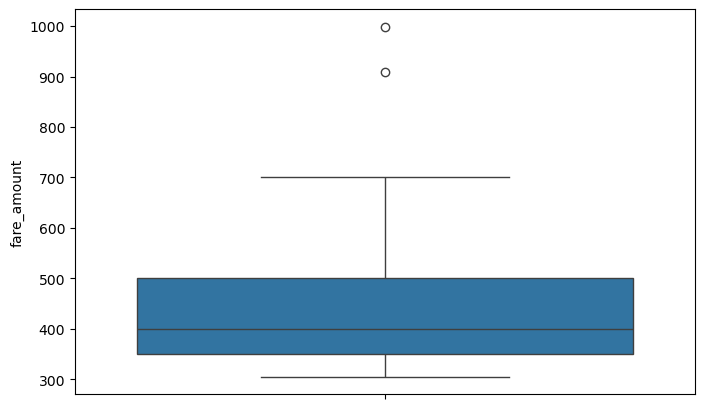

In [49]:
# Continue with outlier handling
#Entries where trip_distance is nearly 0 and fare_amount is more than 300
outliers1 = df[(df["trip_distance"] <= 0.01) & (df["fare_amount"] > 300)]

# Create a boxplot for the fare_amount column
plt.figure(figsize=(8, 5))
sns.boxplot(y=outliers1["fare_amount"])
plt.show()


In [50]:
#There are outliers above $700, values reaching  $900, and even $1000 for trip_distance <=0.01.
df[(df["trip_distance"] <= 0.01) & (df["fare_amount"] > 700)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee
38085,1,2023-01-09 16:17:32,2023-01-09 16:20:41,1.0,0.0,5.0,141,141,3,999.0,0.0,0.0,0.0,0.0,1.0,1000.0,0.0,2023-01-09,16,0.0
1171493,1,2023-02-09 07:37:30,2023-02-09 07:39:13,1.0,0.0,5.0,246,246,4,910.0,0.0,0.0,0.0,0.0,1.0,911.0,0.0,2023-02-09,7,0.0


In [51]:
#High fare amount for 0.00  distance and pickup and drop time is also minimal ,so its better to remove these records from the sample
df.shape[0]#1896379
df=df[~((df["trip_distance"] <= 0.01) & (df["fare_amount"] > 700))]#4
df.shape[0]#1896377

1896377

In [52]:
#Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
df[(df["trip_distance"] == 0) & (df["fare_amount"] == 0) & (df["PULocationID"] != df["DOLocationID"])]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee
43681,1,2023-01-10 19:28:41,2023-01-10 20:14:48,1.0,0.0,1.0,127,91,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-01-10,19,0.0
83048,1,2023-01-18 15:42:00,2023-01-18 15:42:00,1.0,0.0,1.0,161,264,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-01-18,15,0.0
83247,1,2023-01-18 16:23:49,2023-01-18 16:23:49,1.0,0.0,1.0,239,264,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-01-18,16,0.0
90721,1,2023-01-19 21:57:21,2023-01-19 22:17:44,1.0,0.0,1.0,170,75,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.5,2023-01-19,21,0.0
142069,1,2023-01-29 18:33:14,2023-01-29 18:33:14,1.0,0.0,5.0,261,264,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-01-29,18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718458,1,2023-07-24 14:14:22,2023-07-24 14:14:22,1.0,0.0,1.0,229,264,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-07-24,14,0.0
1735378,1,2023-07-27 18:59:15,2023-07-27 18:59:15,2.0,0.0,5.0,231,264,2,0.0,5.0,0.0,0.0,0.0,0.0,5.0,2.5,2023-07-27,18,0.0
1844320,1,2023-09-17 20:40:48,2023-09-17 20:40:48,1.0,0.0,5.0,79,264,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-09-17,20,0.0
1854559,2,2023-09-19 21:27:12,2023-09-19 21:27:48,1.0,0.0,1.0,7,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-09-19,21,0.0


In [53]:
#it indicates data inconsistency,both trip distance and fare amount is 0.Fare amount can be adjusted by total fare-(all other taxes and fares),but we cannot estimate trip distance as its only 63 records we can delete it.
df.shape[0]#1896377
df=df[~((df["trip_distance"] <= 0.0) & (df["fare_amount"] == 0) & (df["PULocationID"] != df["DOLocationID"]))]#63 records
df.shape[0]#1896314

1896314

In [54]:
#Entries where trip_distance is more than 250 miles.
df[df["trip_distance"] > 250.0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee
30438,2,2023-01-07 20:02:05,2023-01-07 20:07:10,1.0,721.26,1.0,145,7,1,7.90,0.0,0.5,2.00,0.00,1.0,11.40,0.0,2023-01-07,20,0.00
111442,2,2023-01-24 06:27:00,2023-01-24 07:18:00,1.0,3253.99,1.0,230,90,0,19.24,0.0,0.5,4.51,0.00,0.3,27.05,2.5,2023-01-24,6,0.00
136826,2,2023-01-28 18:16:37,2023-01-28 18:41:22,1.0,2003.03,1.0,48,113,0,18.87,0.0,0.5,3.00,0.00,1.0,25.87,2.5,2023-01-28,18,0.00
137589,2,2023-01-28 20:39:00,2023-01-28 20:59:00,1.0,10451.89,1.0,142,224,0,19.94,0.0,0.5,4.79,0.00,1.0,28.73,2.5,2023-01-28,20,0.00
152189,2,2023-10-01 00:05:00,2023-10-01 00:19:00,1.0,34804.51,1.0,263,151,0,14.45,0.0,0.5,3.69,0.00,1.0,22.14,2.5,2023-10-01,0,0.00
316935,2,2023-10-30 07:13:00,2023-10-30 07:33:00,1.0,4547.48,1.0,143,136,0,36.47,0.0,0.5,4.05,0.00,1.0,44.52,2.5,2023-10-30,7,0.00
439631,2,2023-11-20 11:46:00,2023-11-20 12:30:00,1.0,22869.37,1.0,179,237,0,27.39,0.0,0.5,0.00,0.00,1.0,31.39,2.5,2023-11-20,11,0.00
539719,2,2023-12-08 23:45:00,2023-12-09 00:14:00,1.0,22414.00,1.0,65,188,0,21.69,0.0,0.5,4.64,0.00,1.0,27.83,2.5,2023-12-08,23,0.00
547189,2,2023-12-10 01:11:00,2023-12-10 01:25:00,1.0,35482.69,1.0,224,33,0,25.91,0.0,0.5,4.49,0.00,1.0,34.40,2.5,2023-12-10,1,0.00
550654,2,2023-12-10 17:10:00,2023-12-10 17:12:00,1.0,33133.96,1.0,142,142,0,12.02,0.0,0.5,2.40,0.00,1.0,18.42,2.5,2023-12-10,17,0.00


In [55]:
df.shape[0]#1896314
df=df[~(df["trip_distance"] > 250.0)]#46
df.shape[0]#1896268

1896268

In [56]:
#Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
df[df["payment_type"]==0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,1.0,19.24,1.0,66,107,0,25.64,0.0,0.5,5.93,0.00,1.0,35.57,2.5,2023-01-01,0,0.0
15,2,2023-01-01 00:41:50,2023-01-01 01:14:50,1.0,10.77,1.0,151,106,0,45.38,0.0,0.5,11.19,6.55,1.0,67.12,2.5,2023-01-01,0,0.0
42,2,2023-01-01 00:37:21,2023-01-01 00:54:18,1.0,4.52,1.0,114,262,0,25.38,0.0,0.5,0.00,0.00,1.0,29.38,2.5,2023-01-01,0,0.0
43,2,2023-01-01 00:44:03,2023-01-01 01:13:49,1.0,9.19,1.0,239,256,0,40.00,0.0,0.5,2.20,0.00,1.0,46.20,2.5,2023-01-01,0,0.0
46,2,2023-01-01 00:50:55,2023-01-01 01:19:06,1.0,2.74,1.0,90,48,0,18.48,0.0,0.5,3.37,0.00,1.0,25.85,2.5,2023-01-01,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896343,1,2023-09-30 23:18:31,2023-09-30 23:30:35,1.0,0.00,1.0,43,229,0,12.55,0.0,0.5,0.00,0.00,1.0,16.55,2.5,2023-09-30,23,0.0
1896356,1,2023-09-30 23:42:07,2023-10-01 00:05:22,1.0,0.00,1.0,255,209,0,34.02,0.0,0.5,0.00,0.00,1.0,38.02,2.5,2023-09-30,23,0.0
1896369,1,2023-09-30 23:59:39,2023-10-01 00:15:03,1.0,0.00,1.0,137,249,0,21.50,0.0,0.5,0.00,0.00,1.0,25.50,2.5,2023-09-30,23,0.0
1896376,1,2023-09-30 23:47:09,2023-10-01 00:03:01,1.0,3.50,1.0,233,144,0,21.28,0.0,0.5,0.00,0.00,1.0,25.28,2.5,2023-09-30,23,0.0


In [57]:
#There are 64844 records with payment_type as zero,that is almost 3.41% so deleting these records is not a wise decision ,instead of this we can replace the value to 5 as its known as unknown
df.loc[df["payment_type"]==0, "payment_type"] = 5
df[df["payment_type"]==0] # 0 columns

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896268 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  date                   object        
 18  hour                   int3

In [59]:
#Do any columns need standardising?
#Passenger_count can be changed from float to int as the content is a whole number it can be changed into int
df["passenger_count"] = df["passenger_count"].astype(int)

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [60]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'hour',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical 
* `tpep_pickup_datetime`: datetime
* `tpep_dropoff_datetime`: datetime
* `passenger_count`:Numerical
* `trip_distance`:Numerical
* `RatecodeID`:Ordinal Categorical
* `PULocationID`:Ordinal Categorical
* `DOLocationID`:Ordinal Categorical
* `payment_type`:Oridinal Categorical
* `pickup_hour`:Categorical
* `trip_duration`:Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`
#The monetary parameters listed are Numerical. They represent continuous monetary amounts and are used for calculations such as totals, averages, or comparisons.

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

hour
0      53675
1      36027
2      23766
3      15675
4      10634
5      11135
6      26322
7      51822
8      71809
9      80986
10     87909
11     95426
12    103585
13    106799
14    114453
15    117397
16    117501
17    127859
18    133934
19    119652
20    106582
21    106494
22     98682
23     78144
dtype: int64


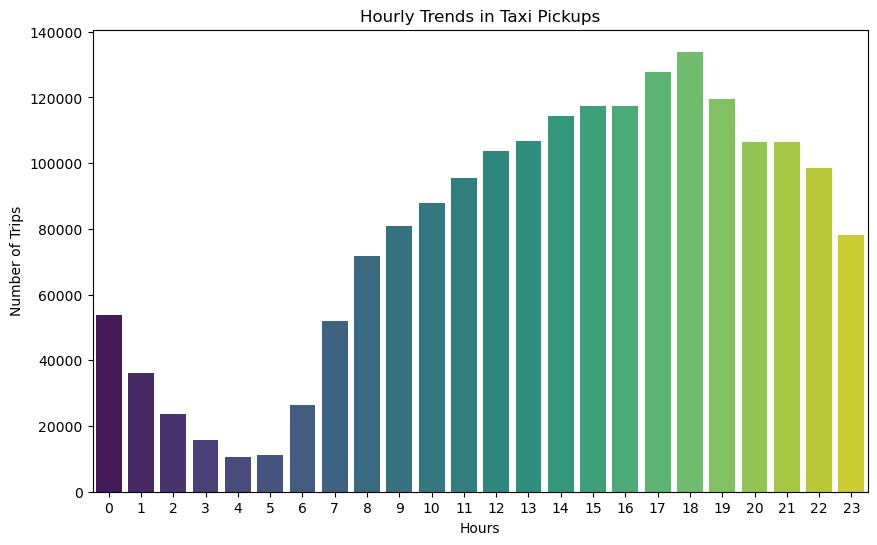

In [61]:
# Find and show the hourly trends in taxi pickups
#we have dervied hour column from tpep_pickup_dateeime,we can group the count based on hour
hourly_trends=df.groupby("hour").size()
print(hourly_trends)
plt.figure(figsize=(10,6))
sns.barplot(x=hourly_trends.index, y=hourly_trends.values, palette="viridis")
plt.xlabel("Hours")
plt.ylabel("Number of Trips")
plt.title("Hourly Trends in Taxi Pickups")
plt.show()

In [ ]:
#The graph shows that there are more number of trips during the 18th hour(6PM),followed by 17th hour(5PM)and the least at 4AM

weekday
Monday       236300
Tuesday      274267
Wednesday    290493
Thursday     297287
Friday       282172
Saturday     276138
Sunday       239611
dtype: int64


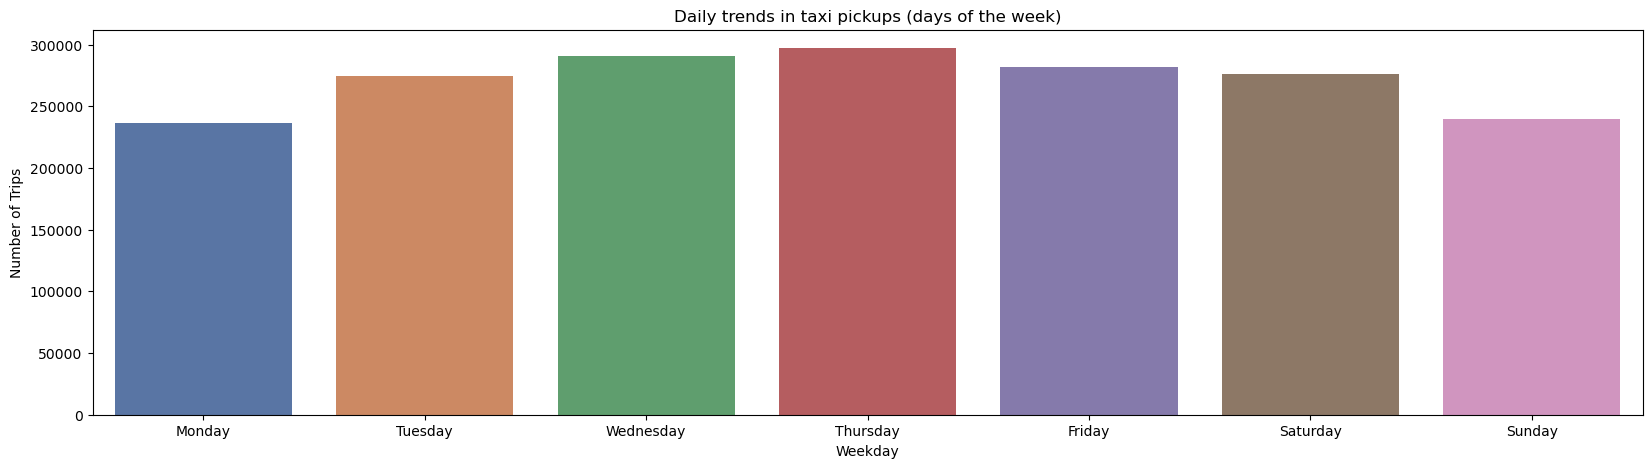

In [62]:
# Find and show the daily trends in taxi pickups (days of the week)
df["weekday"] = df["tpep_pickup_datetime"].dt.day_name()#to get the day of week
weekdays_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_trends=df.groupby("weekday").size().reindex(weekdays_order)
print(daily_trends)
plt.figure(figsize=(20,5))
sns.barplot(x=daily_trends.index, y=daily_trends.values, palette="deep")
plt.xlabel("Weekday")
plt.ylabel("Number of Trips")
plt.title("Daily trends in taxi pickups (days of the week)")
plt.show()

In [ ]:
The above chart depicts that there are more number of trips on Thursday,followed by Wednesday and Monday has least trips.

Month
January      152075
February     144445
March        168689
April        162899
May          174057
June         163772
July         143771
August       139637
September    140867
October      174240
November     165124
December     166692
dtype: int64


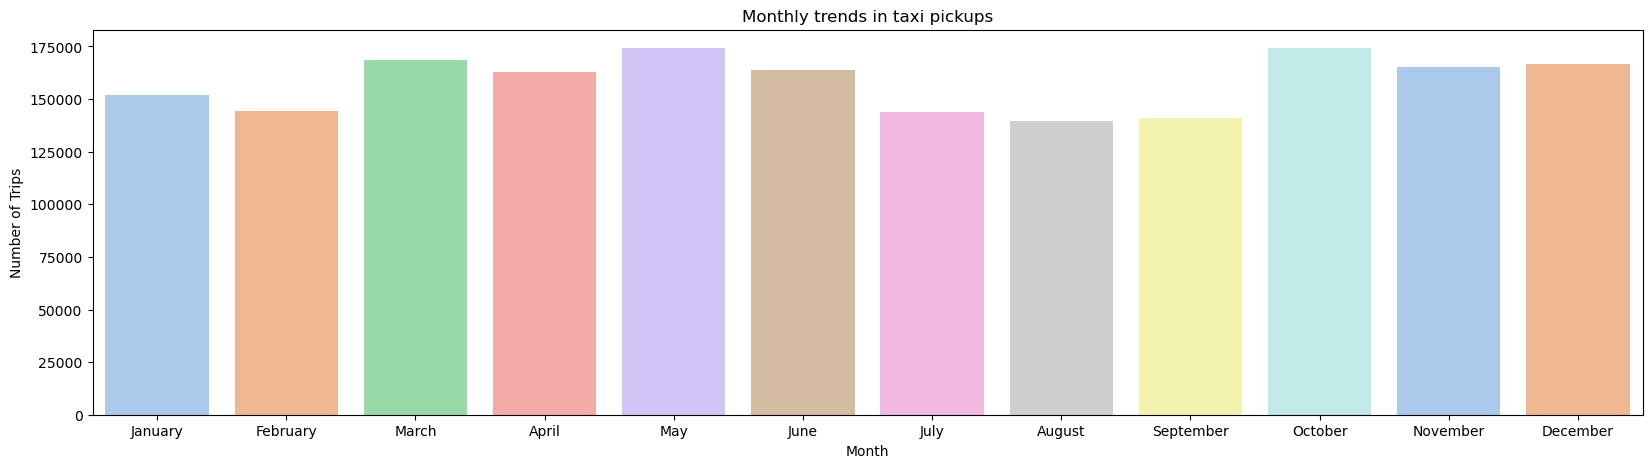

In [63]:
# Show the monthly trends in pickups
df["Month"] = df["tpep_pickup_datetime"].dt.month_name()#to get the month
month_order = ["January", "February", "March", "April", "May", "June", "July","August","September","October","November","December"]
month_trends=df.groupby("Month").size().reindex(month_order)
print(month_trends)
plt.figure(figsize=(20,5))
sns.barplot(x=month_trends.index, y=month_trends.values, palette="pastel")
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.title("Monthly trends in taxi pickups")
plt.show()

In [ ]:
The above chart depicts that there are more number of trips in the month of October,followed by May and August has least trips.

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [64]:
# Analyse the above parameters
df[df["fare_amount"]<=0] # 588 columns
df[df["tip_amount"]<=0] # 435873 columns
df[df["total_amount"]<=0] # 264 columns
df[df["trip_distance"]<=0] # 37657 columns

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee,weekday,Month
77,1,2023-01-01 00:37:09,2023-01-01 00:58:16,1,0.0,1.0,36,7,5,27.50,...,0.00,0.0,1.0,32.00,2.5,2023-01-01,0,0.0,Sunday,January
118,2,2023-01-01 00:47:28,2023-01-01 00:47:32,1,0.0,5.0,232,232,1,14.00,...,0.00,0.0,1.0,15.00,0.0,2023-01-01,0,0.0,Sunday,January
127,1,2023-01-01 00:45:06,2023-01-01 00:54:06,1,0.0,1.0,48,48,2,8.60,...,0.00,0.0,1.0,13.60,2.5,2023-01-01,0,0.0,Sunday,January
236,1,2023-01-01 00:53:00,2023-01-01 01:07:31,1,0.0,1.0,141,79,1,12.80,...,4.45,0.0,1.0,22.25,2.5,2023-01-01,0,0.0,Sunday,January
280,2,2023-01-01 01:34:06,2023-01-01 01:34:14,2,0.0,5.0,265,265,1,50.00,...,10.20,0.0,1.0,61.20,0.0,2023-01-01,1,0.0,Sunday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896356,1,2023-09-30 23:42:07,2023-10-01 00:05:22,1,0.0,1.0,255,209,5,34.02,...,0.00,0.0,1.0,38.02,2.5,2023-09-30,23,0.0,Saturday,September
1896359,2,2023-09-30 23:15:27,2023-09-30 23:22:37,2,0.0,1.0,264,264,1,7.90,...,1.55,0.0,1.0,14.45,2.5,2023-09-30,23,0.0,Saturday,September
1896368,1,2023-09-30 23:13:43,2023-09-30 23:14:07,1,0.0,5.0,148,148,1,10.00,...,0.00,0.0,1.0,11.00,0.0,2023-09-30,23,0.0,Saturday,September
1896369,1,2023-09-30 23:59:39,2023-10-01 00:15:03,1,0.0,1.0,137,249,5,21.50,...,0.00,0.0,1.0,25.50,2.5,2023-09-30,23,0.0,Saturday,September


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [65]:
# Create a df with non zero entries for the selected parameters.
#Fare Amount
df[df["fare_amount"]<=0]#588 rows
#fare amount is a parameter which is calculated from the trip distance and ratecodeid ,as we dont know the ratecode against the ratecodeid value we can't fix these ones and as the number count is 588/1896268~0.03% we can delete it

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee,weekday,Month
3119,1,2023-01-01 19:16:54,2023-01-01 19:17:15,1,0.00,2.0,261,261,3,0.0,...,0.0,0.0,0.0,0.00,0.0,2023-01-01,19,0.00,Sunday,January
3966,2,2023-01-02 05:12:19,2023-01-02 05:41:45,1,17.07,3.0,142,1,2,0.0,...,0.0,0.0,1.0,1.00,0.0,2023-01-02,5,0.00,Monday,January
5039,1,2023-01-02 13:44:07,2023-01-02 13:48:36,1,0.00,1.0,145,145,1,0.0,...,0.0,0.0,0.0,0.00,0.0,2023-01-02,13,0.00,Monday,January
7701,2,2023-01-03 08:27:38,2023-01-03 08:59:16,1,8.34,1.0,161,244,2,0.0,...,0.0,0.0,1.0,4.00,2.5,2023-01-03,8,0.00,Tuesday,January
9093,2,2023-01-03 14:24:45,2023-01-03 14:25:14,1,0.00,2.0,132,132,2,0.0,...,0.0,0.0,1.0,5.25,2.5,2023-01-03,14,1.25,Tuesday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879753,1,2023-09-28 07:00:00,2023-09-28 07:54:54,1,3.00,99.0,95,216,1,0.0,...,0.0,0.0,0.0,0.00,0.0,2023-09-28,7,0.00,Thursday,September
1881612,2,2023-09-28 13:50:44,2023-09-28 13:50:44,1,0.00,99.0,233,233,2,0.0,...,14.2,0.0,1.0,18.20,2.5,2023-09-28,13,0.00,Thursday,September
1888608,1,2023-09-29 16:12:01,2023-09-29 16:13:12,1,0.00,1.0,237,237,3,0.0,...,0.0,0.0,0.0,0.00,0.0,2023-09-29,16,0.00,Friday,September
1892743,1,2023-09-30 13:22:42,2023-09-30 13:33:41,1,2.00,5.0,142,48,3,0.0,...,0.0,0.0,1.0,1.00,0.0,2023-09-30,13,0.00,Saturday,September


In [66]:
df.shape[0]#1896268
df=df[~(df["fare_amount"] <=0)] #588
df.shape[0]#1873933

1895680

In [67]:
#Tip_Amount
df[df["tip_amount"]<=0]#435303 rows
#tip_amount is not mandatory fee,its optional ,a passenger can pay tip or else no ,it is valid to have a tip amount as zero ,hence  it’s not an error or a missing value,deleting these rows can significantly delete a good chunck of data which is approx 22%

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee,weekday,Month
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1,7.74,1.0,138,256,2,32.40,...,0.0,0.0,1.0,41.15,0.0,2023-01-01,0,1.25,Sunday,January
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3,1.44,1.0,237,141,2,11.40,...,0.0,0.0,1.0,16.40,2.5,2023-01-01,0,0.00,Sunday,January
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1,0.54,1.0,143,142,2,6.50,...,0.0,0.0,1.0,11.50,2.5,2023-01-01,0,0.00,Sunday,January
10,2,2023-01-01 00:14:47,2023-01-01 00:20:18,1,0.78,1.0,237,229,2,7.20,...,0.0,0.0,1.0,12.20,2.5,2023-01-01,0,0.00,Sunday,January
16,2,2023-01-01 00:56:42,2023-01-01 01:00:25,1,0.74,1.0,229,141,1,5.80,...,0.0,0.0,1.0,10.80,2.5,2023-01-01,0,0.00,Sunday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896387,1,2023-09-30 23:17:34,2023-09-30 23:30:46,1,0.00,1.0,231,90,5,15.68,...,0.0,0.0,1.0,19.68,2.5,2023-09-30,23,0.00,Saturday,September
1896388,1,2023-09-30 23:41:35,2023-10-01 00:04:10,1,2.80,1.0,79,186,3,17.70,...,0.0,0.0,1.0,22.70,2.5,2023-09-30,23,0.00,Saturday,September
1896389,2,2023-09-30 23:53:03,2023-10-01 00:13:48,1,9.65,1.0,132,225,2,39.40,...,0.0,0.0,1.0,43.65,0.0,2023-09-30,23,1.75,Saturday,September
1896390,2,2023-09-30 23:37:17,2023-09-30 23:46:07,1,0.86,1.0,164,233,2,9.30,...,0.0,0.0,1.0,14.30,2.5,2023-09-30,23,0.00,Saturday,September


In [68]:
df[df["total_amount"]<=0]
#we have deleted rows where fare_amount == 0, then rows with total_amount == 0 would also be affected, since total fare is largely dependent on fare_amount.

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee,weekday,Month


In [69]:
df[df["trip_distance"]<=0]#37395
df[(df["trip_distance"] == 0) & (df["PULocationID"] != df["DOLocationID"])]#21749 records where the pickup and drop locations are different but there trip_distance is zero ,we can drop it.

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee,weekday,Month
77,1,2023-01-01 00:37:09,2023-01-01 00:58:16,1,0.0,1.0,36,7,5,27.50,...,0.00,0.00,1.0,32.00,2.5,2023-01-01,0,0.0,Sunday,January
236,1,2023-01-01 00:53:00,2023-01-01 01:07:31,1,0.0,1.0,141,79,1,12.80,...,4.45,0.00,1.0,22.25,2.5,2023-01-01,0,0.0,Sunday,January
372,1,2023-01-01 01:51:10,2023-01-01 02:19:45,1,0.0,99.0,74,77,1,41.20,...,0.00,6.55,1.0,49.25,0.0,2023-01-01,1,0.0,Sunday,January
378,1,2023-01-01 01:51:26,2023-01-01 02:16:59,1,0.0,1.0,246,262,5,74.78,...,0.00,0.00,1.0,78.78,2.5,2023-01-01,1,0.0,Sunday,January
432,2,2023-01-01 01:34:23,2023-01-01 01:50:21,2,0.0,1.0,43,79,1,13.50,...,3.70,0.00,1.0,22.20,2.5,2023-01-01,1,0.0,Sunday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896306,1,2023-09-30 23:58:41,2023-10-01 00:04:27,1,0.0,1.0,239,143,5,11.33,...,0.00,0.00,1.0,15.33,2.5,2023-09-30,23,0.0,Saturday,September
1896343,1,2023-09-30 23:18:31,2023-09-30 23:30:35,1,0.0,1.0,43,229,5,12.55,...,0.00,0.00,1.0,16.55,2.5,2023-09-30,23,0.0,Saturday,September
1896356,1,2023-09-30 23:42:07,2023-10-01 00:05:22,1,0.0,1.0,255,209,5,34.02,...,0.00,0.00,1.0,38.02,2.5,2023-09-30,23,0.0,Saturday,September
1896369,1,2023-09-30 23:59:39,2023-10-01 00:15:03,1,0.0,1.0,137,249,5,21.50,...,0.00,0.00,1.0,25.50,2.5,2023-09-30,23,0.0,Saturday,September


In [70]:
df.shape[0]#1895680
df = df[~((df["trip_distance"] == 0) & (df["PULocationID"] != df["DOLocationID"]))]#deleting 21749 records
df.shape[0]#1873931

1873931

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

Month
January      4131381.44
February     3913296.87
March        4723659.81
April        4654899.33
May          5082964.13
June         4783075.39
July         4145495.23
August       4042054.16
September    4286502.36
October      5066785.10
November     4718641.44
December     4800854.19
Name: total_amount, dtype: float64


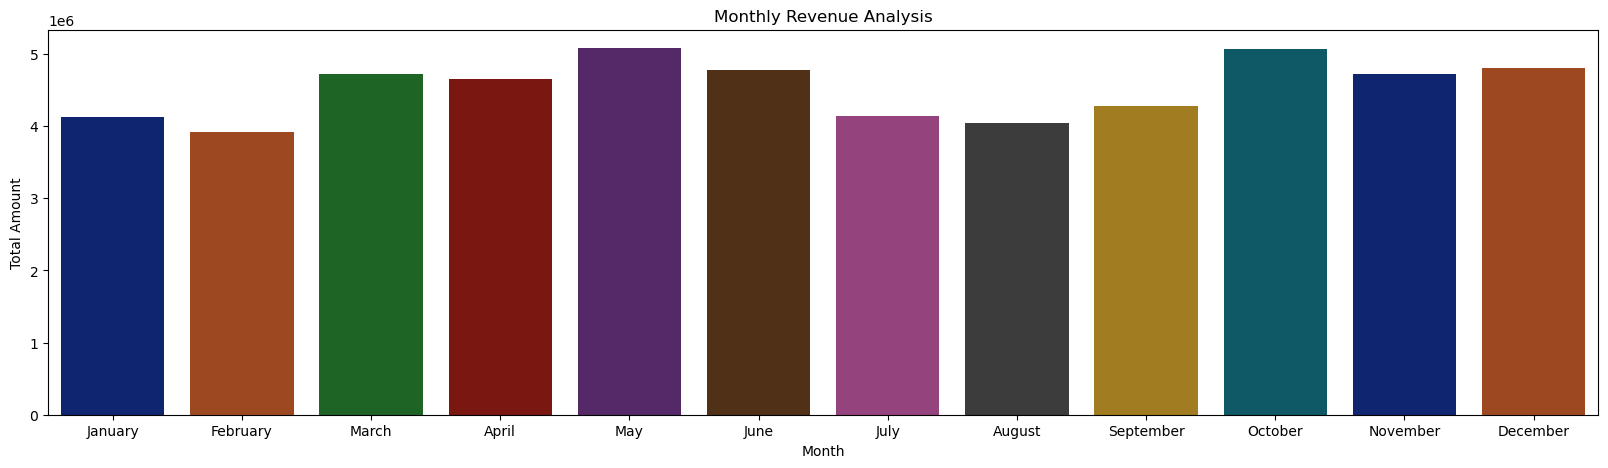

In [71]:
# Group data by month and analyse monthly revenue
monthly_revenue = df.groupby('Month')['total_amount'].sum().reindex(month_order)
print(monthly_revenue)
plt.figure(figsize=(20,5))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette="dark")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.title("Monthly Revenue Analysis")
plt.show()

In [ ]:
#As observed earlier in section 3.1.2, there were a higher number of trips in the months of May and October. Consequently, the revenue generated during these months was also higher.

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

quarter
Q1    12768338.12
Q2    14520938.85
Q3    12474051.75
Q4    14586280.73
Name: total_amount, dtype: float64
quarter
Q1    23.492971
Q2    26.717651
Q3    22.951502
Q4    26.837876
Name: total_amount, dtype: float64


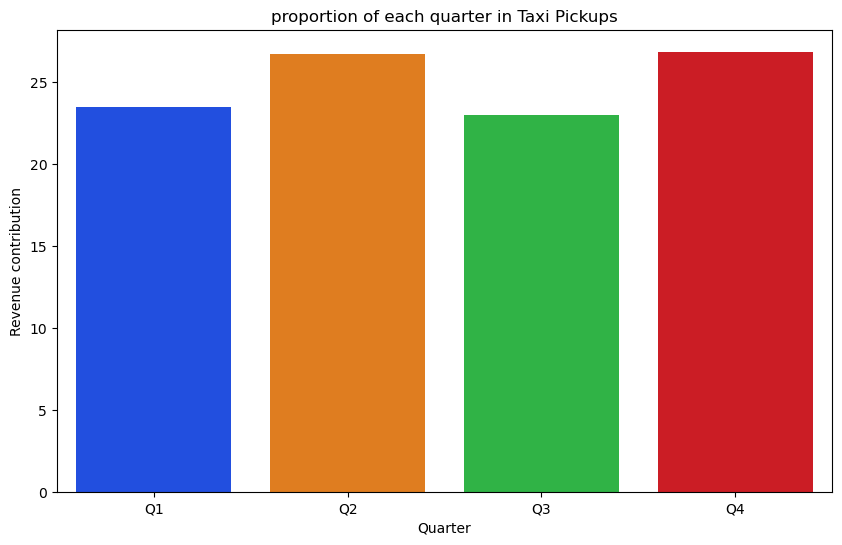

In [72]:
# Calculate proportion of each quarter
df['quarter'] = 'Q' + df['tpep_pickup_datetime'].dt.quarter.astype(str)
quarter_order = ["Q1","Q2","Q3","Q4"]
quarter_revenue=df.groupby('quarter')['total_amount'].sum().reindex(quarter_order)
print(quarter_revenue)
quarter_proportion = (quarter_revenue / quarter_revenue.sum()) * 100
print(quarter_proportion)
plt.figure(figsize=(10,6))
sns.barplot(x=quarter_proportion.index, y=quarter_proportion.values, palette="bright")
plt.xlabel("Quarter")
plt.ylabel("Revenue contribution")
plt.title("proportion of each quarter in Taxi Pickups")
plt.show()


In [ ]:
Quarter 4 has yelded good revenue.

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

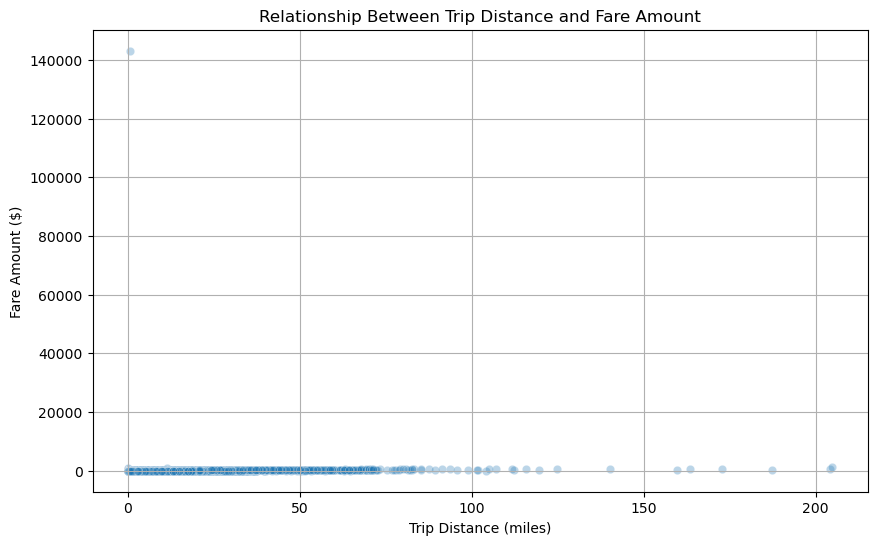

In [73]:
# Show how trip fare is affected by distance
trip_distance=df[~(df["trip_distance"] == 0)]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=trip_distance, x="trip_distance", y="fare_amount", alpha=0.3)
plt.title("Relationship Between Trip Distance and Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()


In [74]:
#the above figure shows some extreme outliers of a fare amount so we can delete the record then plot the graph
df[(df["fare_amount"]>=120000)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee,weekday,Month,quarter
1772349,1,2023-09-05 10:16:13,2023-09-05 10:20:56,1,0.7,1.0,249,90,2,143163.45,...,0.0,1.0,143167.45,2.5,2023-09-05,10,0.0,Tuesday,September,Q3


In [75]:
df=df[~(df["fare_amount"]>=120000)]
df[(df["fare_amount"]>=120000)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee,weekday,Month,quarter


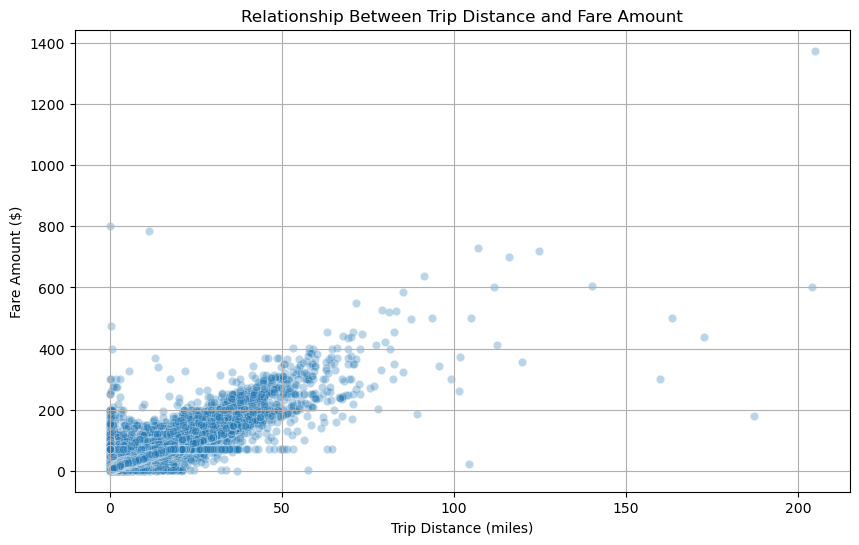

Correlation between trip_distance and fare_amount: 0.943


In [76]:
# Show how trip fare is affected by distance
trip_distance=df[~(df["trip_distance"] == 0)]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=trip_distance, x="trip_distance", y="fare_amount", alpha=0.3)
plt.title("Relationship Between Trip Distance and Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()
correlation = trip_distance['trip_distance'].corr(trip_distance['fare_amount'])
print(f"Correlation between trip_distance and fare_amount: {correlation:.3f}")

In [77]:
#There’s a clear upward trend — as trip distance increases, the fare amount generally increases. This is expected, as longer trips typically cost more.
#Most data points are clustered between 0 and 30 miles, indicating that the majority of taxi rides are short to medium distance.
#There are some outliers with very high fares (over $1000) and unusually long distances (over 200 miles). These could represent rare, special-case trips such as out-of-city airport transfers or long-distance private hires.

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [78]:
# Show relationship between fare and trip duration
df["trip_duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60
df[(df["trip_duration"] < 0)]#checking for neagtive trip duration,deleting the records--114 records


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee,weekday,Month,quarter,trip_duration
176789,6,2023-10-05 16:10:14,2023-10-05 16:10:03,1,7.50,1.0,265,196,5,54.20,...,0.3,55.00,2.5,2023-10-05,16,0.0,Thursday,October,Q4,-0.183333
183835,6,2023-10-06 19:10:49,2023-10-06 19:10:33,1,14.26,1.0,265,220,5,66.89,...,0.3,67.69,2.5,2023-10-06,19,0.0,Friday,October,Q4,-0.266667
204130,6,2023-10-10 19:10:57,2023-10-10 19:10:36,1,3.88,1.0,265,261,5,27.20,...,0.3,28.00,2.5,2023-10-10,19,0.0,Tuesday,October,Q4,-0.350000
236815,6,2023-10-16 13:10:43,2023-10-16 13:10:23,1,1.72,1.0,265,32,5,15.20,...,0.3,16.00,2.5,2023-10-16,13,0.0,Monday,October,Q4,-0.333333
252924,6,2023-10-19 10:10:42,2023-10-19 10:10:22,1,6.04,1.0,265,75,5,40.22,...,0.3,41.02,2.5,2023-10-19,10,0.0,Thursday,October,Q4,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811429,6,2023-09-12 06:09:25,2023-09-12 06:09:22,1,17.29,1.0,265,65,5,47.09,...,0.3,47.89,2.5,2023-09-12,6,0.0,Tuesday,September,Q3,-0.050000
1856219,6,2023-09-20 10:09:24,2023-09-20 10:09:18,1,3.74,1.0,265,92,5,31.20,...,0.3,32.00,2.5,2023-09-20,10,0.0,Wednesday,September,Q3,-0.100000
1856700,6,2023-09-20 12:09:49,2023-09-20 12:09:26,1,5.29,1.0,265,258,5,17.38,...,0.3,18.18,2.5,2023-09-20,12,0.0,Wednesday,September,Q3,-0.383333
1861988,6,2023-09-21 11:09:43,2023-09-21 11:09:14,1,6.60,1.0,265,259,5,36.14,...,0.3,36.94,2.5,2023-09-21,11,0.0,Thursday,September,Q3,-0.483333


In [79]:
df=df[~(df["trip_duration"] < 0)]
df[(df["trip_duration"] < 0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee,weekday,Month,quarter,trip_duration


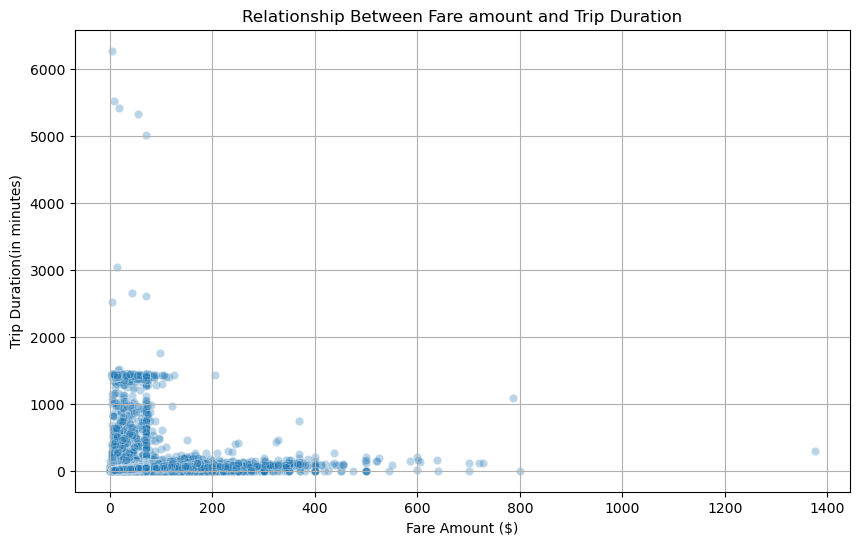

Correlation between fare_amount and trip_duration: 0.267


In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="fare_amount", y="trip_duration", alpha=0.3)
plt.title("Relationship Between Fare amount and Trip Duration")
plt.xlabel("Fare Amount ($)")
plt.ylabel("Trip Duration(in minutes)")
plt.grid(True)
plt.show()
correlation = df['fare_amount'].corr(df['trip_duration'])
print(f"Correlation between fare_amount and trip_duration: {correlation:.3f}")

In [ ]:
#Most trips have shorter durations (under 1000 minutes) and correspond to lower fare amounts (under $200). This cluster shows typical, everyday rides.

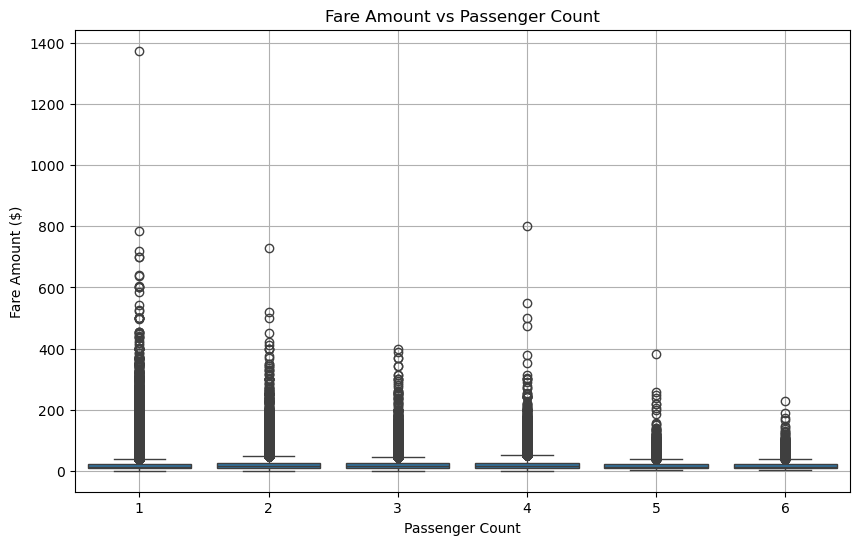

Correlation between fare_amount and passenger_count: 0.042


In [81]:
# Show relationship between fare and number of passengers
df[(df["passenger_count"] == 0)]
plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.title("Fare Amount vs Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()
correlation = df['fare_amount'].corr(df['passenger_count'])
print(f"Correlation between fare_amount and passenger_count: {correlation:.3f}")

In [ ]:
#The distribution of fare amounts is still quite similar across all valid passenger counts.The medians remain close, indicating no strong effect of passenger count on the typical fare.

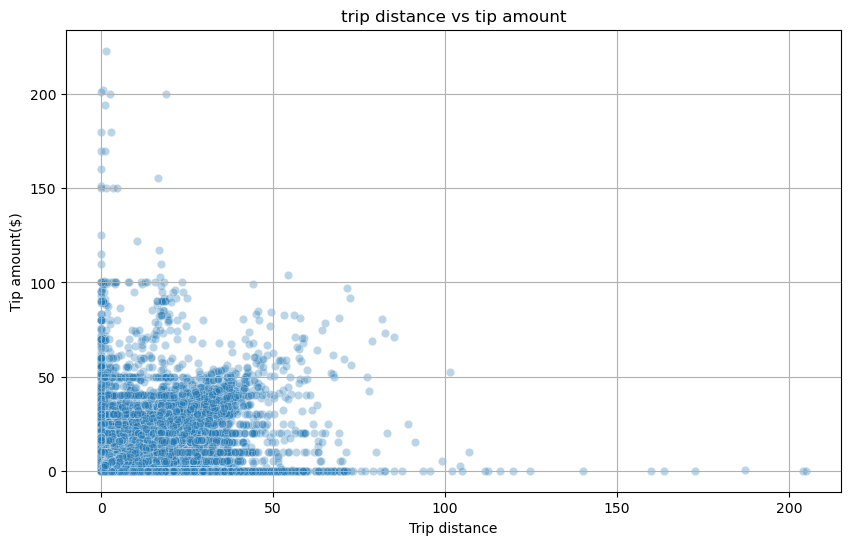

Correlation between fare_amount and passenger_count: 0.574


In [82]:
# Show relationship between tip and trip distance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="trip_distance", y="tip_amount", alpha=0.3)
plt.title("trip distance vs tip amount")
plt.xlabel("Trip distance")
plt.ylabel("Tip amount($)")
plt.grid(True)
plt.show()
correlation = df['trip_distance'].corr(df['tip_amount'])
print(f"Correlation between fare_amount and passenger_count: {correlation:.3f}")

In [ ]:
#Majority of trips fall under 50 miles in distance and $0–$50 in tip amount , indicating most trips are relatively short and modestly tipped.

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

payment_type_label
Credit card    1486409
Cash            314751
Unknown          50675
Dispute          13396
No charge         8702
Name: count, dtype: int64


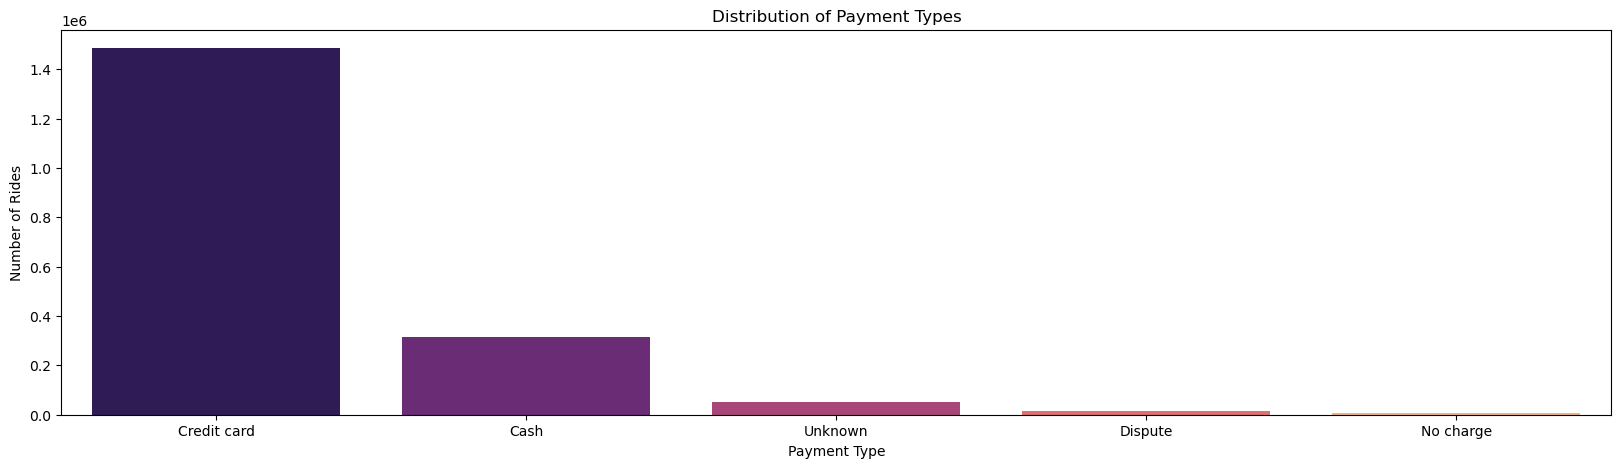

In [119]:
# Analyse the distribution of different payment types (payment_type).
payment_type_labels = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown'
}

df['payment_type_label'] = df['payment_type'].map(payment_type_labels)

# Count and sort
payment_counts = df['payment_type_label'].value_counts()
print(payment_counts)
# Plot
plt.figure(figsize=(20, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values,palette="magma")
plt.title("Distribution of Payment Types")
plt.ylabel("Number of Rides")
plt.xlabel("Payment Type")
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [143]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [84]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(r'C:\Users\CSG\Desktop\upgrad\EDA-Assignment\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones\taxi_zones.shp')
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

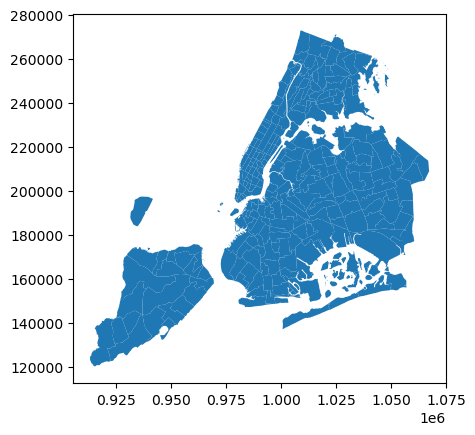

In [85]:
print(zones.info())
zones = gpd.GeoDataFrame(zones, geometry='geometry')
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [86]:
# Merge zones and trip records using locationID and PULocationID
df=pd.merge(left=df,right=zones, how='left', left_on='PULocationID', right_on='LocationID')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,quarter,trip_duration,payment_type_label,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1,7.74,1.0,138,256,2,32.40,...,Q1,15.950000,Cash,138.0,0.107467,0.000537,LaGuardia Airport,138.0,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031..."
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2,1.24,1.0,161,237,1,7.90,...,Q1,5.083333,Credit card,161.0,0.035804,0.000072,Midtown Center,161.0,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21..."
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3,1.44,1.0,237,141,2,11.40,...,Q1,10.550000,Cash,237.0,0.042213,0.000096,Upper East Side South,237.0,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21..."
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1,0.54,1.0,143,142,2,6.50,...,Q1,5.416667,Cash,143.0,0.054180,0.000151,Lincoln Square West,143.0,Manhattan,"POLYGON ((989338.1 223572.253, 989368.225 2235..."
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,1,19.24,1.0,66,107,5,25.64,...,Q1,18.000000,Unknown,66.0,0.054633,0.000108,DUMBO/Vinegar Hill,66.0,Brooklyn,"POLYGON ((990055.507 196472.349, 990004.46 196..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [87]:
# Group data by location and calculate the number of trips
trip_count = df.groupby("LocationID").size().reset_index(name="trip_count")
print(trip_count)

     LocationID  trip_count
0           1.0         203
1           2.0           2
2           3.0          35
3           4.0        2238
4           5.0          10
..          ...         ...
250       259.0          45
251       260.0         354
252       261.0        9844
253       262.0       24999
254       263.0       35921

[255 rows x 2 columns]


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [88]:
# Merge trip counts back to the zones GeoDataFrame

zones=pd.merge(left=trip_count,right=zones, how='left', left_on='LocationID', right_on='LocationID')
zones.head()


,LocationID,trip_count,OBJECTID,Shape_Leng,Shape_Area,zone,borough,geometry
0,1.0,203,1,0.116357,0.000782,Newark Airport,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2.0,2,2,0.433470,0.004866,Jamaica Bay,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3.0,35,3,0.084341,0.000314,Allerton/Pelham Gardens,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4.0,2238,4,0.043567,0.000112,Alphabet City,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5.0,10,5,0.092146,0.000498,Arden Heights,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

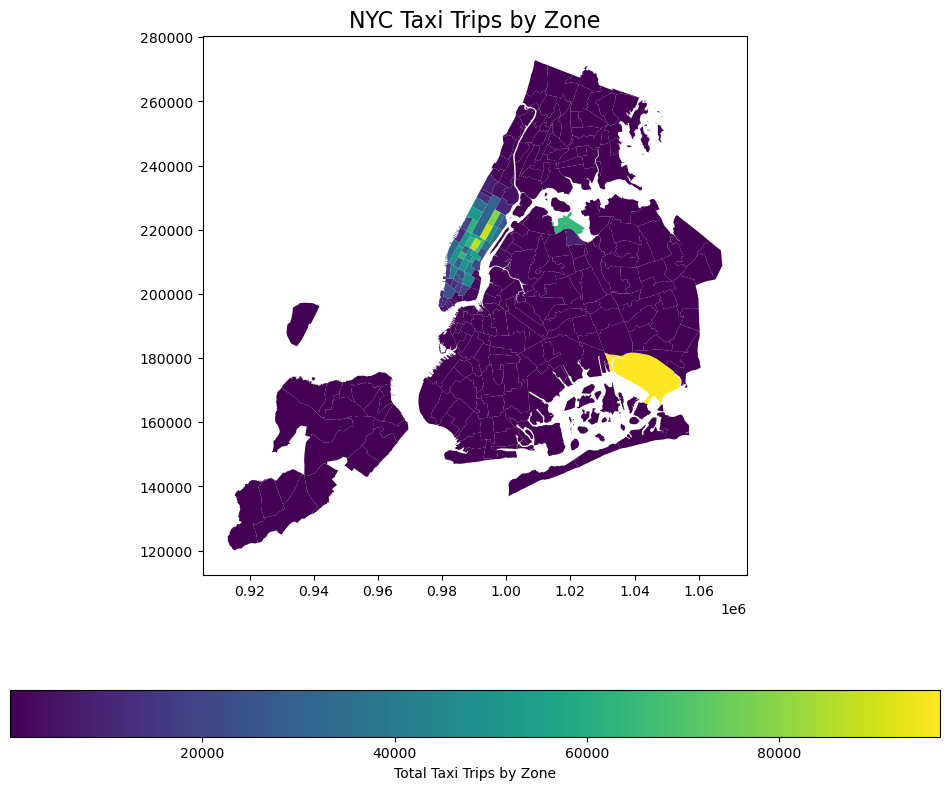

In [89]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
# Plot the map and display it
zones = gpd.GeoDataFrame(zones, geometry='geometry')
zones.plot(
    column='trip_count',                     
    cmap='viridis',                           
    linewidth=0.8,
    ax=ax,                        
    legend=True,
    legend_kwds={'label': "Total Taxi Trips by Zone", 'orientation': "horizontal"}
)
ax.set_title("NYC Taxi Trips by Zone", fontsize=16)
plt.show()

In [90]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted = zones.sort_values(by='trip_count', ascending=False)
print(zones_sorted)

     LocationID  trip_count  OBJECTID  Shape_Leng  Shape_Area  \
125       132.0       96691       132    0.245479    0.002038   
229       237.0       88166       237    0.042213    0.000096   
154       161.0       86914       161    0.035804    0.000072   
228       236.0       79176       236    0.044252    0.000103   
155       162.0       66342       162    0.035270    0.000048   
..          ...         ...       ...         ...         ...   
82         84.0           1        84    0.233624    0.002074   
108       115.0           1       115    0.116169    0.000373   
165       172.0           1       172    0.118476    0.000658   
213       221.0           1       221    0.166218    0.000890   
237       245.0           1       245    0.095983    0.000466   

                                  zone        borough  \
125                        JFK Airport         Queens   
229              Upper East Side South      Manhattan   
154                     Midtown Center      Manh

In [122]:
zones.sort_values(by='trip_count', ascending=True)

,PULocationID,passenger_count,LocationID,trip_count,OBJECTID,Shape_Leng,Shape_Area,zone,borough,geometry
26,27,1.000000,27.0,1.0,27.0,0.202509,0.001341,Breezy Point/Fort Tilden/Riis Beach,Queens,"POLYGON ((1021692.969 147138.664, 1021883.624 ..."
83,84,1.000000,84.0,1.0,84.0,0.233624,0.002074,Eltingville/Annadale/Prince's Bay,Staten Island,"POLYGON ((939754.454 131548.91, 939802.804 131..."
108,115,1.000000,115.0,1.0,115.0,0.116169,0.000373,Grymes Hill/Clifton,Staten Island,"POLYGON ((961850.466 167915.309, 961831.926 16..."
165,172,1.000000,172.0,1.0,172.0,0.118476,0.000658,New Dorp/Midland Beach,Staten Island,"POLYGON ((960204.812 146820.751, 960103.437 14..."
236,245,1.000000,245.0,1.0,245.0,0.095983,0.000466,West Brighton,Staten Island,"POLYGON ((957085.564 172591.26, 957142.385 172..."
...,...,...,...,...,...,...,...,...,...,...
228,237,1.336469,237.0,88166.0,237.0,0.042213,0.000096,Upper East Side South,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21..."
125,132,1.497062,132.0,96691.0,132.0,0.245479,0.002038,JFK Airport,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283..."
56,57,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
255,264,1.345379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [123]:
# Find routes which have the slowest speeds at different times of the day
#grouping the pickuplocation and droplocation and hour and calculating the avg trip_distance and avg trip_duration 
route_hour=df.groupby(['PULocationID', 'DOLocationID', 'hour']).agg({
    'trip_distance': 'mean',
    'trip_duration': 'mean'
}).reset_index()
route_hour['avg_speed']=route_hour['trip_distance']/route_hour['trip_duration']
#route_hour.sort_values(by='avg_speed').head(200)
route_hour[route_hour['PULocationID'] != route_hour['DOLocationID']].sort_values(by='avg_speed').head(200)


,PULocationID,DOLocationID,hour,trip_distance,trip_duration,avg_speed
107868,232,65,13,0.490000,5522.433333,0.000089
120895,243,264,17,0.180000,1389.550000,0.000130
9374,43,10,10,0.020000,53.966667,0.000371
36261,100,7,8,0.220000,334.433333,0.000658
7514,40,65,21,1.120000,1434.433333,0.000781
...,...,...,...,...,...,...
93905,193,140,10,0.400000,38.816667,0.010305
36931,100,98,21,8.920000,865.066667,0.010311
95043,209,25,22,3.054000,296.033333,0.010316
31426,88,1,17,14.850000,1435.200000,0.010347


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

hour
0      52731
1      35377
2      23279
3      15326
4      10261
5      10827
6      25814
7      50940
8      70781
9      80237
10     87240
11     94618
12    102653
13    105774
14    113431
15    116304
16    116395
17    126355
18    132307
19    118306
20    105485
21    105264
22     97326
23     76902
Name: count, dtype: int64


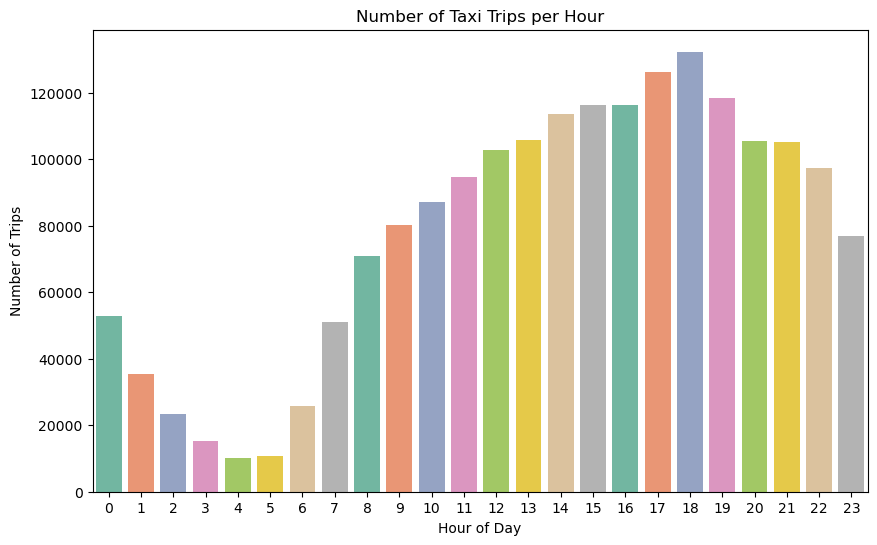

Busiest hour of the day is: 18:00 with number of trips: 132307


In [92]:
# Visualise the number of trips per hour and find the busiest hour
trips_per_hour = df['hour'].value_counts().sort_index()
print(trips_per_hour)
plt.figure(figsize=(10, 6))
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values,palette="Set2")
plt.title("Number of Taxi Trips per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.show()
#busiest hour using idmax() function
print(f"Busiest hour of the day is: {trips_per_hour.idxmax()}:00 with number of trips: {trips_per_hour.max()}")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [93]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =0.05#[5%]
scaled_trips=trips_per_hour/sample_fraction
scaled_trips.sort_values(ascending=False).head(5)

hour
18    2646140.0
17    2527100.0
19    2366120.0
16    2327900.0
15    2326080.0
Name: count, dtype: float64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

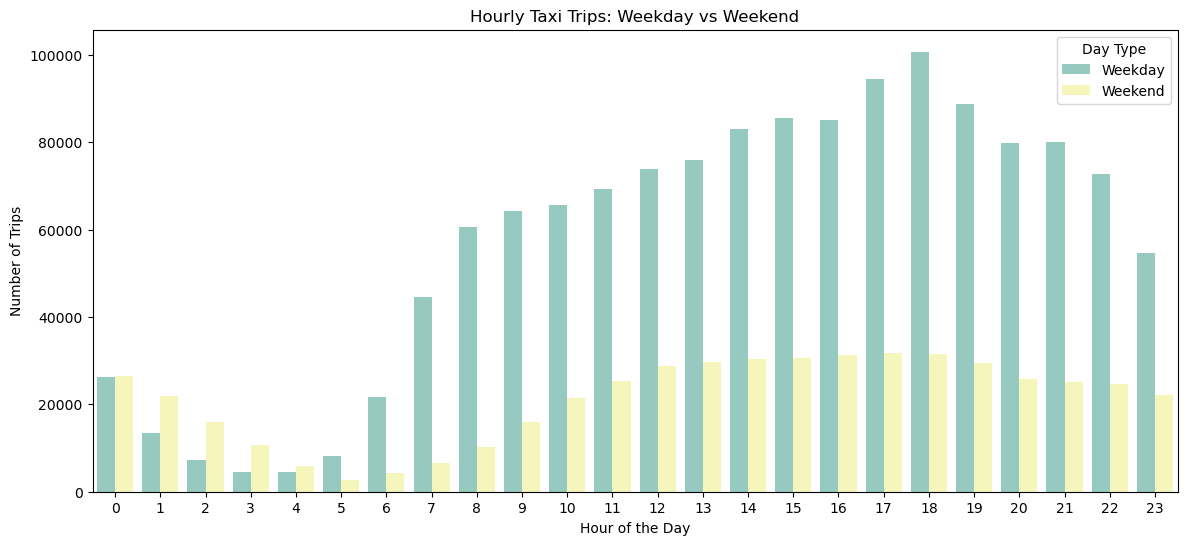

In [94]:
# Compare traffic trends for the week days and weekends
df['day_type'] = df['weekday'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
hour_daytype = df.groupby(['hour', 'day_type']).size().reset_index(name='num_trips')
plt.figure(figsize=(14, 6))
sns.barplot(x='hour', y='num_trips', hue='day_type', data=hour_daytype, palette='Set3')
plt.title("Hourly Taxi Trips: Weekday vs Weekend")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.legend(title='Day Type')
plt.show()


In [ ]:
#There's a clear peak in the evening hours (around 17:00–19:00), likely due to post-work commute or travel,Overall, weekdays show a gradual rise from 6 AM, peaking in the late afternoon/evening.
#Trip counts are more evenly distributed on weekends, with moderate activity throughout the day,Late night and early morning hours (12 AM – 3 AM) have higher trip volumes than weekdays, possibly reflecting nightlife or late outings.

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

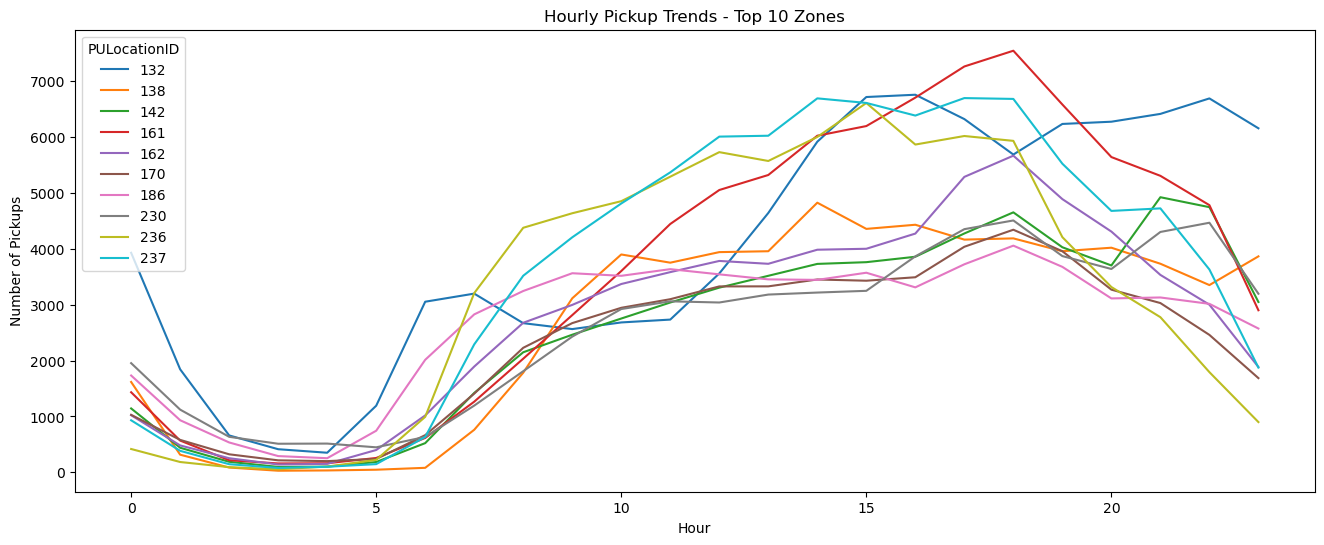

In [95]:
# Find top 10 pickup and dropoff zones
# Find top 10 pickup and dropoff zones
top_pu_zones = df['PULocationID'].value_counts().head(10).index
#Find top 10 dropoff zones
top_do_zones = df['DOLocationID'].value_counts().head(10).index

pickup_df = df[df['PULocationID'].isin(top_pu_zones)]
dropoff_df = df[df['DOLocationID'].isin(top_do_zones)]

# Group pickup and dropoff data by hour and location
pickup_trends = pickup_df.groupby(['hour', 'PULocationID']).size().reset_index(name='pickup_count')
dropoff_trends = dropoff_df.groupby(['hour', 'DOLocationID']).size().reset_index(name='dropoff_count')

#Pickup trend
plt.figure(figsize=(16, 6))
sns.lineplot(data=pickup_trends, x='hour', y='pickup_count', hue='PULocationID', palette='tab10')
plt.title("Hourly Pickup Trends - Top 10 Zones")
plt.xlabel("Hour")
plt.ylabel("Number of Pickups")
plt.legend(title='PULocationID')
plt.show()


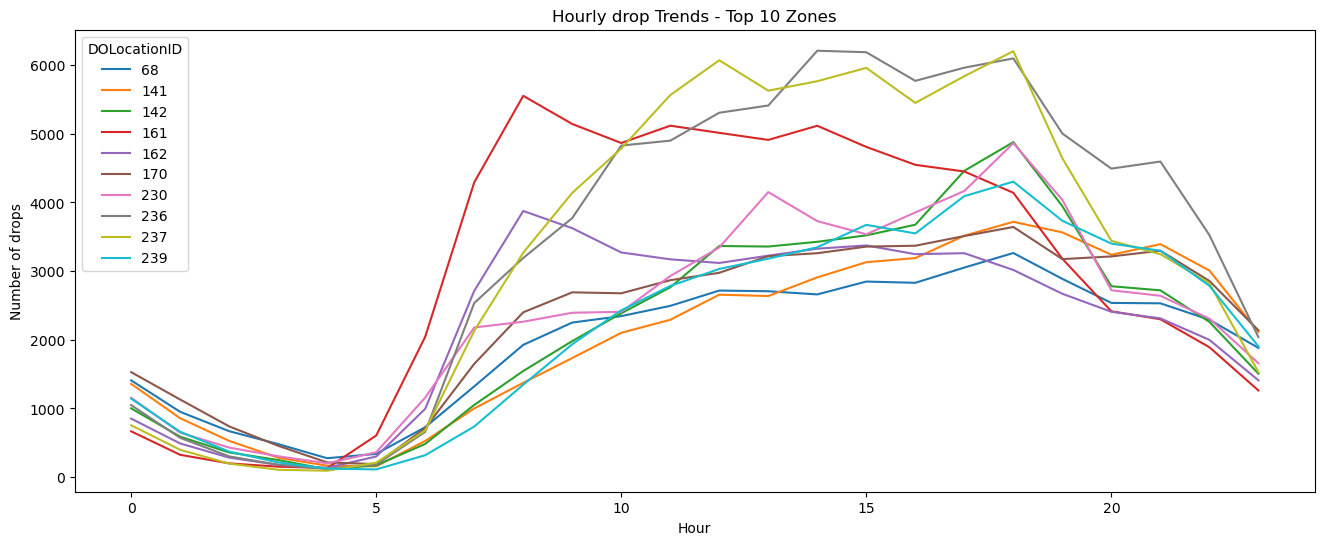

In [96]:
#drop trend
plt.figure(figsize=(16, 6))
sns.lineplot(data=dropoff_trends, x='hour', y='dropoff_count', hue='DOLocationID', palette='tab10')
plt.title("Hourly drop Trends - Top 10 Zones")
plt.xlabel("Hour")
plt.ylabel("Number of drops")
plt.legend(title='DOLocationID')
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [134]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_counts = df['PULocationID'].value_counts()
dropoff_counts = df['DOLocationID'].value_counts()

# Combine into a single DataFrame
zone_stats = pd.DataFrame({
    'pickup_count': pickup_counts,
    'dropoff_count': dropoff_counts
}).fillna(0)  # Fill missing values with 0

# Calculate pickup/dropoff ratio
zone_stats['pickup_dropoff_ratio'] = zone_stats['pickup_count'] / (zone_stats['dropoff_count'] + 1)  # +1 to avoid division by zero

# Sort and get top 10 and bottom 10
top_10 = zone_stats.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
bottom_10 = zone_stats.sort_values(by='pickup_dropoff_ratio').head(10)

print("Top 10 Pickup/Dropoff Ratios:")
print(top_10)

print("\nBottom 10 Pickup/Dropoff Ratios:")
print(bottom_10)


Top 10 Pickup/Dropoff Ratios:
     pickup_count  dropoff_count  pickup_dropoff_ratio
70         8343.0          990.0              8.418769
132       96691.0        22604.0              4.277417
138       64318.0        24445.0              2.631023
199           2.0            0.0              2.000000
186       63911.0        40851.0              1.564452
114       24774.0        18007.0              1.375722
43        31134.0        22725.0              1.369973
249       41386.0        31111.0              1.330226
162       66342.0        53261.0              1.245578
161       86914.0        73136.0              1.188373

Bottom 10 Pickup/Dropoff Ratios:
     pickup_count  dropoff_count  pickup_dropoff_ratio
30            0.0           18.0              0.000000
176           0.0           12.0              0.000000
99            0.0            3.0              0.000000
27            1.0           38.0              0.025641
221           1.0           36.0              0.027027
2

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

Top Pickups during during (11pm to 5am)
   PULocationID                          zone  pickup_count
0            79                  East Village         16098
1           132                   JFK Airport         14548
2           249                  West Village         12871
3            48                  Clinton East         10696
4           148               Lower East Side         10002
5           114       Greenwich Village South          9013
6           230     Times Sq/Theatre District          8380
7           186  Penn Station/Madison Sq West          7059
8           164                 Midtown South          6344
9            68                  East Chelsea          6242


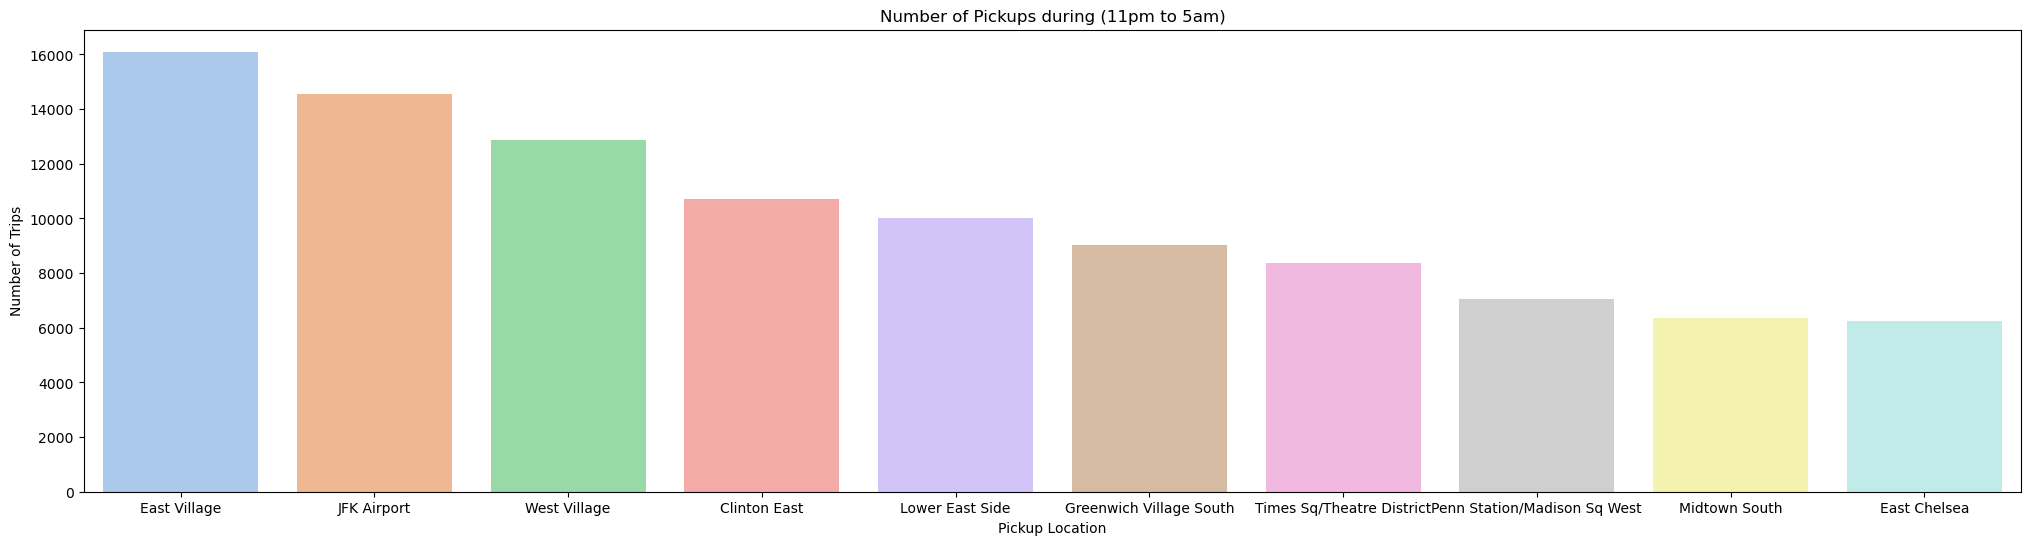

   DOLocationID                       zone  drop_count
0            79               East Village        8544
1            48               Clinton East        7100
2           170                Murray Hill        6395
3            68               East Chelsea        6005
4           107                   Gramercy        5851
5           141            Lenox Hill West        5462
6           263             Yorkville West        5202
7           249               West Village        5050
8           230  Times Sq/Theatre District        4759
9           239      Upper West Side South        4530


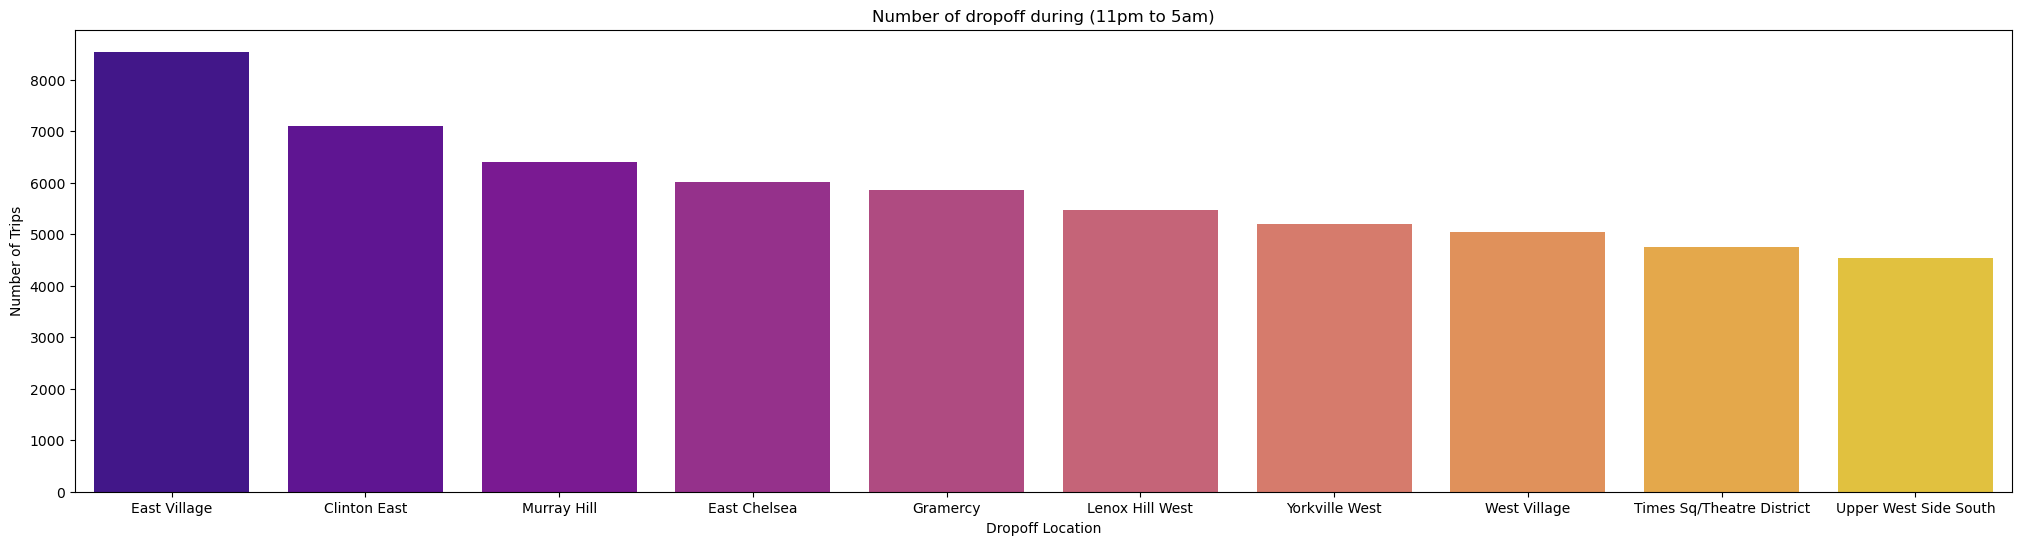

In [137]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_hours = df[(df["hour"] == 23) | (df["hour"] <= 5)]

# Get top 10 pickup zone IDs by frequency
top_pickups = night_hours['PULocationID'].value_counts().head(10).reset_index()
top_pickups.columns = ['PULocationID', 'pickup_count']

# Merge with zone names
top_pickups = top_pickups.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')

# Display result
print("Top Pickups during during (11pm to 5am)")
print(top_pickups[['PULocationID', 'zone', 'pickup_count']])


plt.figure(figsize=(25, 6))
sns.barplot(x=top_pickups.zone, y=top_pickups.pickup_count,palette="pastel")
plt.title("Number of Pickups during (11pm to 5am)")
plt.xlabel("Pickup Location")
plt.ylabel("Number of Trips")
plt.show()


      
# Get top 10 drop zone IDs by frequency
top_dropoff = night_hours['DOLocationID'].value_counts().head(10).reset_index()
top_dropoff.columns = ['DOLocationID', 'drop_count']

top_dropoff = top_dropoff.merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how='left')

# Display result
print(top_dropoff[['DOLocationID', 'zone', 'drop_count']])

plt.figure(figsize=(25, 6))
sns.barplot(x=top_dropoff.zone, y=top_dropoff.drop_count,palette="plasma")
plt.title("Number of dropoff during (11pm to 5am)")
plt.xlabel("Dropoff Location")
plt.ylabel("Number of Trips")
plt.show()



Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

  time_of_the_day  Total_Revenue
0         daytime    47563732.78
1       nighttime     6644568.46


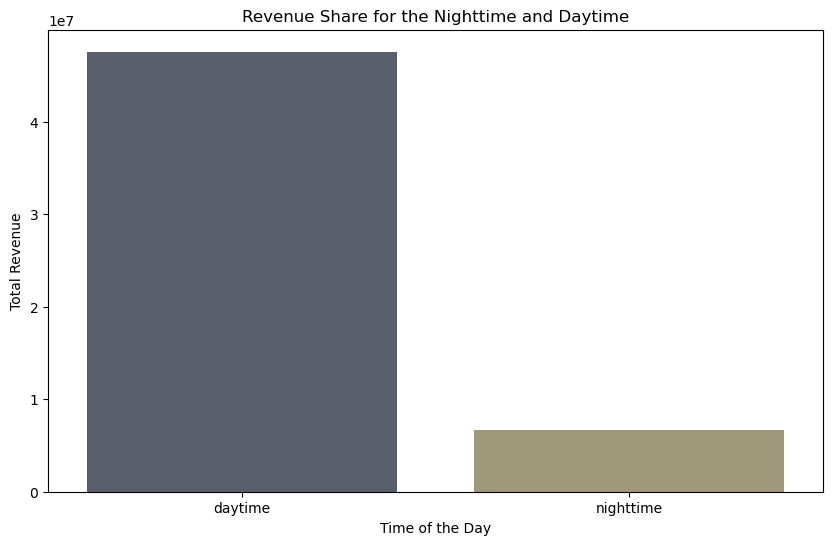

In [98]:
# Filter for night hours (11 PM to 5 AM)
df['time_of_the_day'] = df['hour'].apply(lambda x: 'nighttime' if x in [23,0,1,2,3,4,5] else 'daytime')
revenue_Share=df.groupby('time_of_the_day')['total_amount'].sum().reset_index()
revenue_Share.columns=['time_of_the_day', 'Total_Revenue']
print(revenue_Share)
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_Share,x='time_of_the_day', y='Total_Revenue',palette='cividis')
plt.title("Revenue Share for the Nighttime and Daytime")
plt.xlabel("Time of the Day")
plt.ylabel("Total Revenue")
plt.show()


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

   passenger_count  fare_per_mile_per_passenger
0                1                    10.819636
1                2                     6.435831
2                3                     3.908175
3                4                     4.442612
4                5                     1.709582
5                6                     1.350748


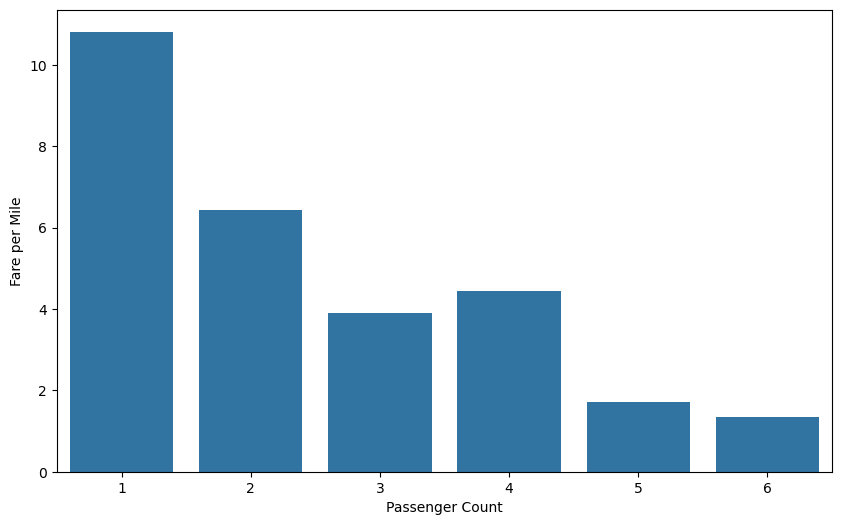

In [99]:
# Analyse the fare per mile per passenger for different passenger counts
# Analyse the fare per mile per passenger for different passenger counts
df_filtered = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)]
df_filtered['fare_per_mile_per_passenger'] = df_filtered['fare_amount'] / (df_filtered['trip_distance'] * df_filtered['passenger_count'])
revenue_Share=df_filtered.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
print(revenue_Share)
plt.figure(figsize=(10,6))
sns.barplot(data=revenue_Share,x='passenger_count',y='fare_per_mile_per_passenger')
plt.xlabel('Passenger Count')
plt.ylabel('Fare per Mile')
plt.show()


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

     weekday  fare_per_mile
0     Monday      10.927990
1    Tuesday      11.324551
2  Wednesday      11.041058
3   Thursday      11.241392
4     Friday      10.904955
5   Saturday      10.873127
6     Sunday      12.550587


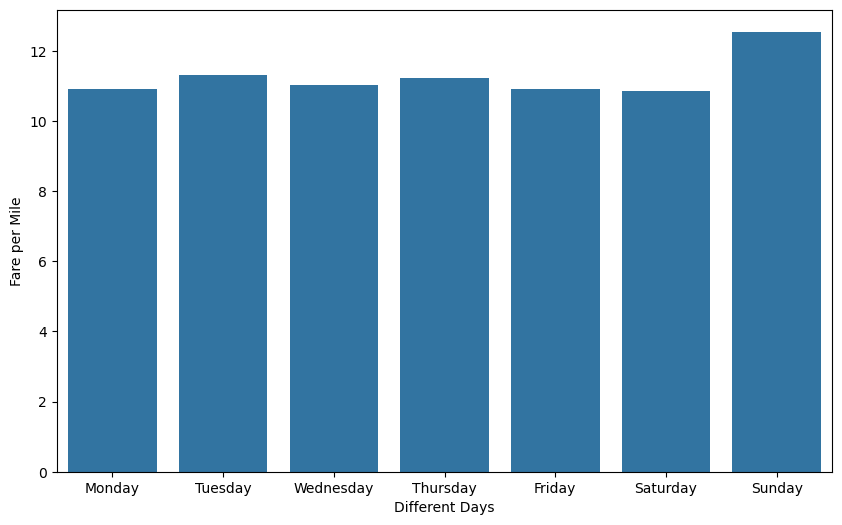

In [100]:
# Compare the average fare per mile for different days and for different times of the day
df_filtered['fare_per_mile']=df_filtered['fare_amount'] / (df_filtered['trip_distance'])
weekdays_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
avg_fare_different_days=df_filtered.groupby('weekday')['fare_per_mile'].mean().loc[weekdays_order].reset_index()
print(avg_fare_different_days)
plt.figure(figsize=(10,6))
sns.barplot(data=avg_fare_different_days,x='weekday',y='fare_per_mile')
plt.xlabel('Different Days')
plt.ylabel('Fare per Mile')
plt.show()


    hour  fare_per_mile
0      0      10.468009
1      1      11.211110
2      2       9.875171
3      3      10.802813
4      4      13.230628
5      5      13.894166
6      6      10.988200
7      7      10.164931
8      8      10.307984
9      9      10.466128
10    10      10.739090
11    11      10.939953
12    12      12.011519
13    13      11.939303
14    14      11.635168
15    15      12.498288
16    16      13.817297
17    17      11.966133
18    18      11.547573
19    19      11.552982
20    20       9.561032
21    21       9.485384
22    22      10.125980
23    23      10.711245


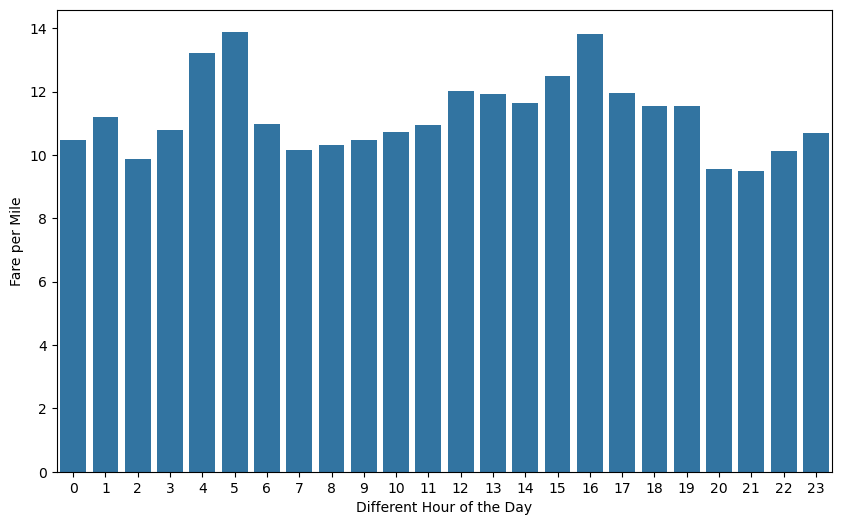

In [101]:
avg_fare_different_hours=df_filtered.groupby('hour')['fare_per_mile'].mean().reset_index()
print(avg_fare_different_hours)
plt.figure(figsize=(10,6))
sns.barplot(data=avg_fare_different_hours,x='hour',y='fare_per_mile')
plt.xlabel('Different Hour of the Day')
plt.ylabel('Fare per Mile')
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

    VendorID  hour  fare_per_mile
0          1     0       6.795081
1          1     1       7.055755
2          1     2       6.932000
3          1     3       6.510311
4          1     4       7.498874
..       ...   ...            ...
64         6    19       5.251338
65         6    20       3.828599
66         6    21       3.790070
67         6    22       7.059671
68         6    23       4.208472

[69 rows x 3 columns]


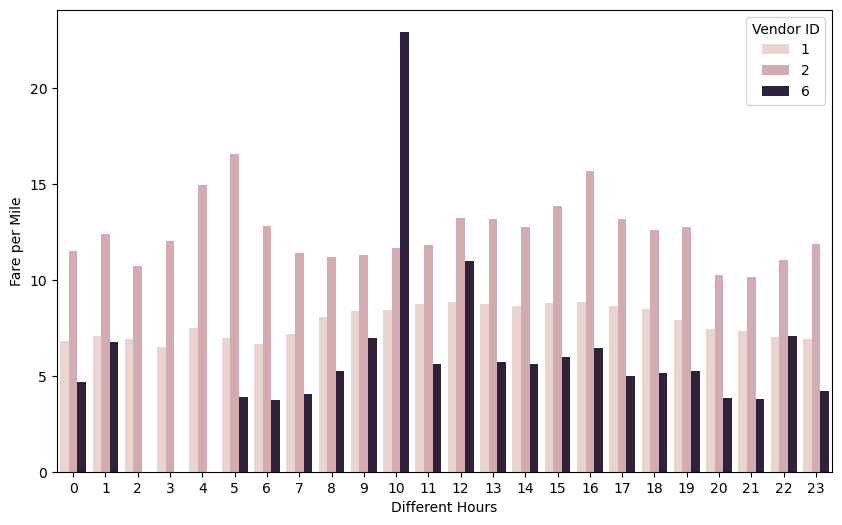

In [102]:
# Compare fare per mile for different vendors
vendor_id_hour=df_filtered.groupby(['VendorID','hour'])['fare_per_mile'].mean().reset_index()
print(vendor_id_hour)
plt.figure(figsize=(10,6))
sns.barplot(data=vendor_id_hour,x='hour',y='fare_per_mile',hue='VendorID')
plt.xlabel('Different Hours')
plt.ylabel('Fare per Mile')
plt.legend(title="Vendor ID")
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


   VendorID distance_tier  fare_per_mile
0         1     0-2 miles       9.912013
3         2     0-2 miles      18.023912
6         6     0-2 miles      38.122035
1         1     2-5 miles       6.382525
4         2     2-5 miles       6.538501
7         6     2-5 miles       8.294061
2         1      >5 miles       4.426744
5         2      >5 miles       4.490938
8         6      >5 miles       4.367008


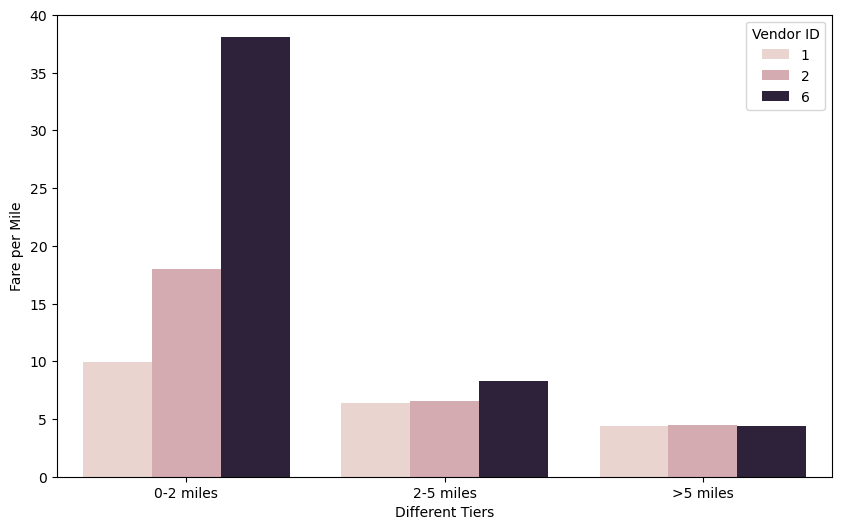

In [103]:
# Defining distance tiers
def distance_tier(dist):
    if dist <= 2:
        return '0-2 miles'
    elif dist <= 5:
        return '2-5 miles'
    else:
        return '>5 miles'

df_filtered['distance_tier'] = df_filtered['trip_distance'].apply(distance_tier)
fare_analysis = df_filtered.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()
fare_analysis = fare_analysis.sort_values(by=['distance_tier', 'VendorID'])
print(fare_analysis)
plt.figure(figsize=(10,6))
sns.barplot(data=fare_analysis,x='distance_tier',y='fare_per_mile',hue='VendorID')
plt.xlabel('Different Tiers')
plt.ylabel('Fare per Mile')
plt.legend(title="Vendor ID")
plt.show()



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [104]:
df[df["fare_amount"] == 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,payment_type_label,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,day_type,time_of_the_day


  distance_tier  tip_percentage
0     0-2 miles       22.364552
1     2-5 miles       18.631551
2      >5 miles       17.523800


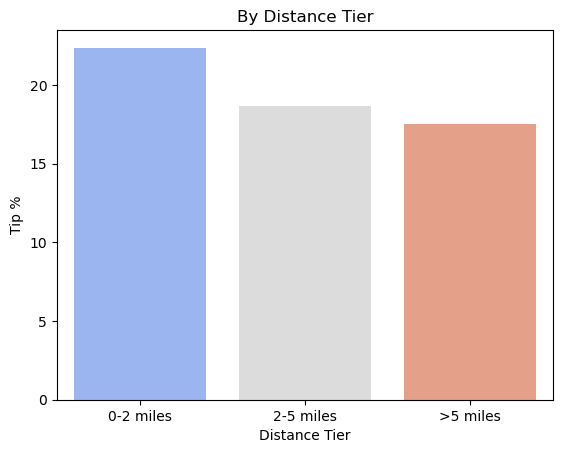

   passenger_count  tip_percentage
0                1       20.779341
1                2       19.730210
2                3       19.027092
3                4       17.454155
4                5       20.491740
5                6       20.602921


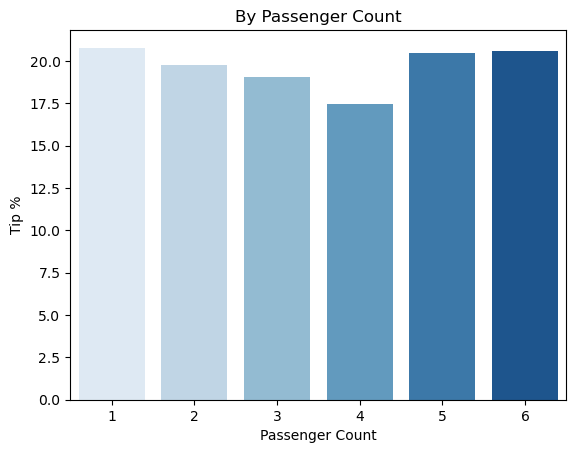

    hour  tip_percentage
0      0       20.283104
1      1       20.432968
2      2       20.376030
3      3       20.204433
4      4       18.042224
5      5       17.461459
6      6       18.331031
7      7       19.498217
8      8       19.918841
9      9       19.644564
10    10       19.223425
11    11       19.166608
12    12       19.111539
13    13       19.026891
14    14       18.987558
15    15       18.960154
16    16       20.822130
17    17       24.307098
18    18       22.088533
19    19       22.039225
20    20       21.386189
21    21       21.390538
22    22       21.137194
23    23       20.453246


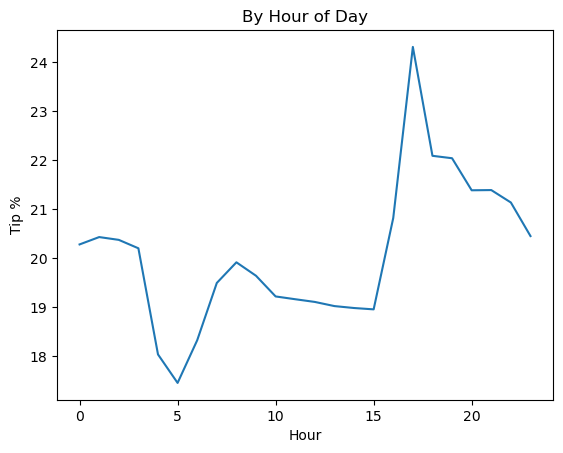

In [105]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df_filtered['tip_percentage'] = (df_filtered['tip_amount']/df_filtered['fare_amount'])*100

#based on trip distances
tip_by_distance = df_filtered.groupby('distance_tier')['tip_percentage'].mean().reset_index()
print(tip_by_distance)
sns.barplot(data=tip_by_distance, x='distance_tier', y='tip_percentage', palette='coolwarm')
plt.title("By Distance Tier")
plt.ylabel("Tip %")
plt.xlabel("Distance Tier")

plt.show()


#based on passenger counts
tip_by_customer=df_filtered.groupby('passenger_count')['tip_percentage'].mean().reset_index()
print(tip_by_customer)

sns.barplot(data=tip_by_customer, x='passenger_count', y='tip_percentage', palette='Blues')
plt.title("By Passenger Count")
plt.ylabel("Tip %")
plt.xlabel("Passenger Count")

plt.show()

#based on hour 
tip_by_hour = df_filtered.groupby('hour')['tip_percentage'].mean().reset_index()
print(tip_by_hour)

sns.lineplot(data=tip_by_hour, x='hour', y='tip_percentage')
plt.title("By Hour of Day")
plt.ylabel("Tip %")
plt.xlabel("Hour")

plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [106]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

low_tips=df_filtered[df_filtered['tip_percentage'] < 10]
high_tips=df_filtered[df_filtered['tip_percentage'] > 25]

print("Average values for low tip trips (<10%)")
print(low_tips[['trip_distance', 'fare_amount', 'passenger_count', 'hour']].mean())

print("\nAverage values for high tip trips (>25%)")
print(high_tips[['trip_distance', 'fare_amount', 'passenger_count', 'hour']].mean())


Average values for low tip trips (<10%)
trip_distance       3.938108
fare_amount        21.667735
passenger_count     1.417360
hour               13.919788
dtype: float64

Average values for high tip trips (>25%)
trip_distance       2.310641
fare_amount        14.440777
passenger_count     1.358733
hour               14.594737
dtype: float64


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

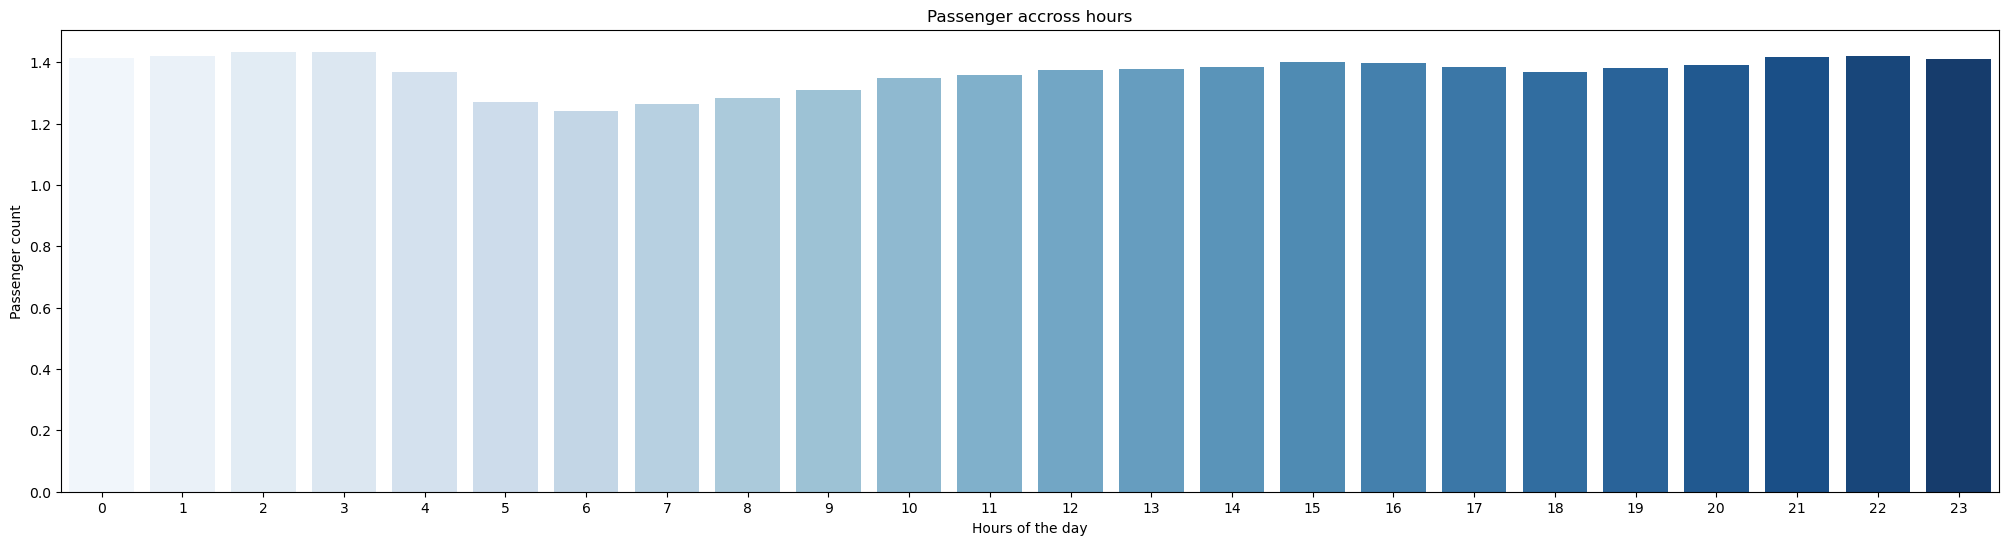

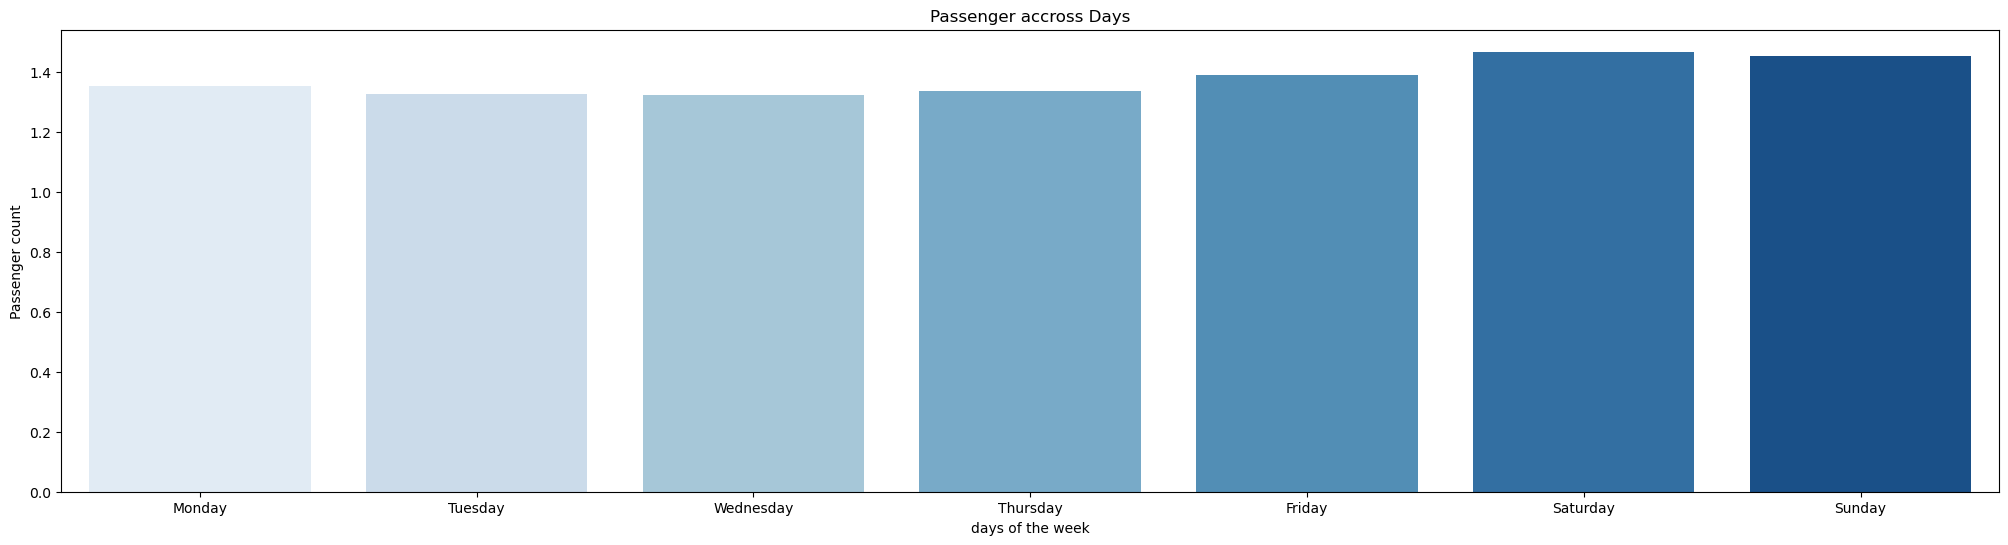

In [107]:
# See how passenger count varies across hours and days
#passenger count accross hours
passenger_count_hour=df_filtered.groupby('hour')['passenger_count'].mean().reset_index()
plt.figure(figsize=(25,6))
sns.barplot(data=passenger_count_hour,x='hour',y='passenger_count',palette='Blues')
plt.xlabel('Hours of the day')
plt.ylabel('Passenger count')
plt.title("Passenger accross hours")
plt.show()

#passenger count accross days
passenger_count_days=df_filtered.groupby('weekday')['passenger_count'].mean().loc[weekdays_order].reset_index()
plt.figure(figsize=(25,6))
sns.barplot(data=passenger_count_days,x='weekday',y='passenger_count',palette='Blues')
plt.xlabel('days of the week')
plt.ylabel('Passenger count')
plt.title("Passenger accross Days")
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

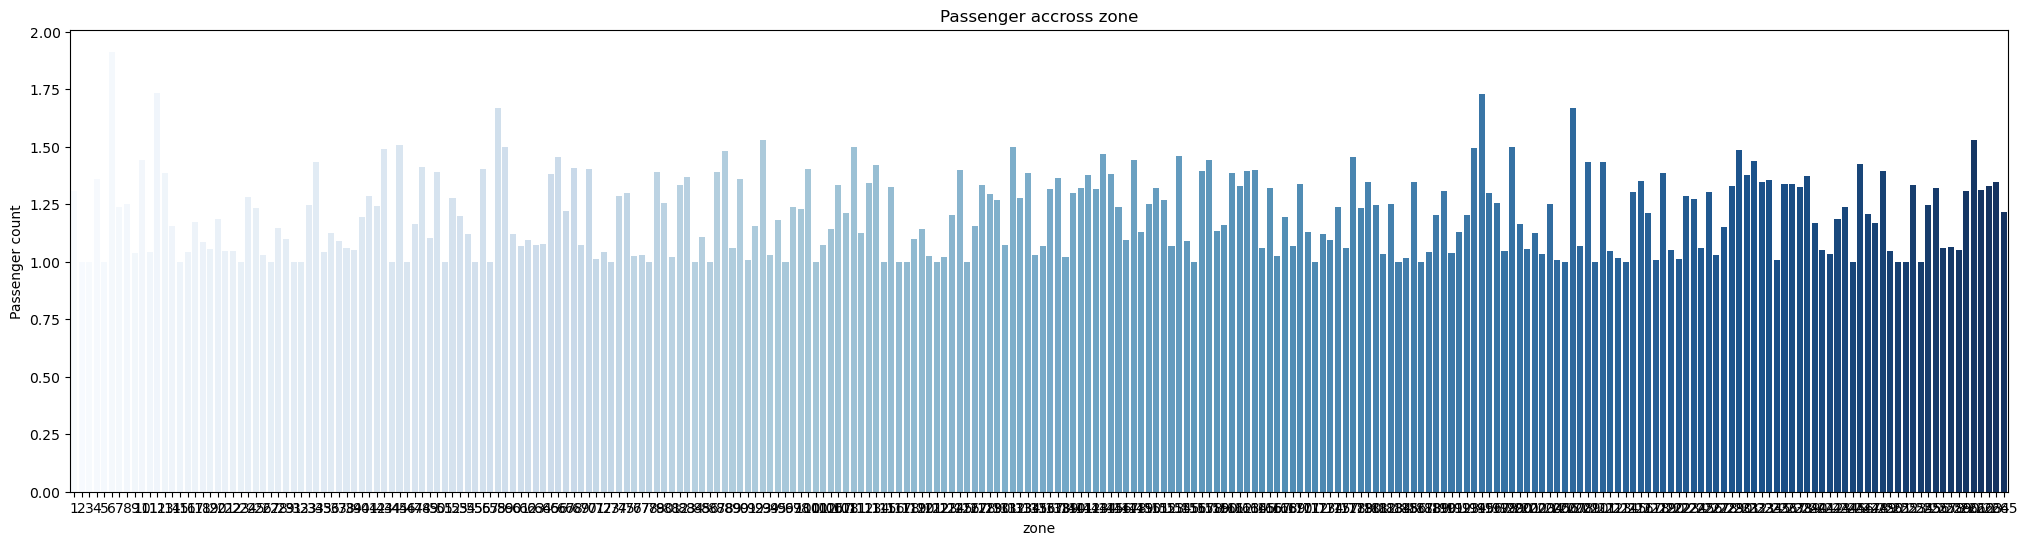

In [108]:
# How does passenger count vary across zones
passenger_count_zone=df_filtered.groupby('PULocationID')['passenger_count'].mean().reset_index()
plt.figure(figsize=(25,6))
sns.barplot(data=passenger_count_zone,x='PULocationID',y='passenger_count',palette='Blues')
plt.xlabel('zone')
plt.ylabel('Passenger count')
plt.title("Passenger accross zone")
plt.show()

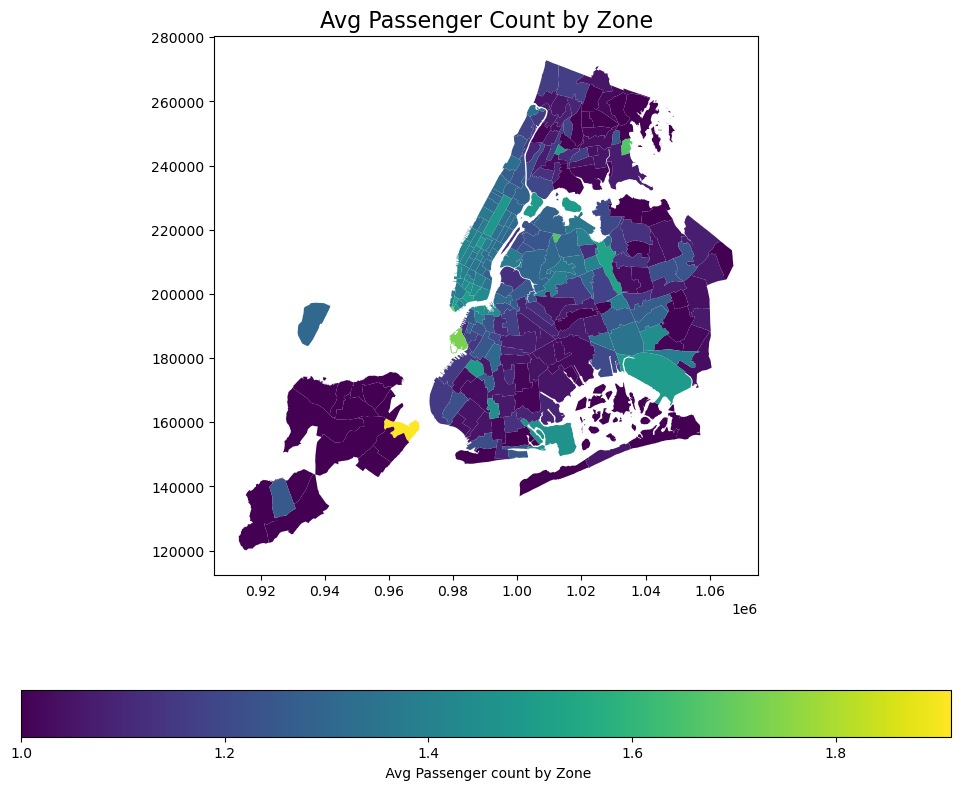

In [110]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
zones.head()
zones=pd.merge(left=passenger_count_zone,right=zones, how='left', left_on='PULocationID', right_on='LocationID')
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
zones = gpd.GeoDataFrame(zones, geometry='geometry')
zones.plot(
    column='passenger_count',                     
    cmap='viridis',                           
    linewidth=0.8,
    ax=ax,                        
    legend=True,
    legend_kwds={'label': " Avg Passenger count by Zone", 'orientation': "horizontal"}
)
ax.set_title("Avg Passenger Count by Zone", fontsize=16)
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [139]:
# How often is each surcharge applied?
pickup_surcharge = df.groupby(['PULocationID', 'congestion_surcharge']).size().reset_index(name='count')
pickup_surcharge = pickup_surcharge.sort_values(by='count', ascending=False)
print(pickup_surcharge.head(10))

drop_surcharge = df.groupby(['DOLocationID', 'congestion_surcharge']).size().reset_index(name='count')
drop_surcharge = drop_surcharge.sort_values(by='count', ascending=False)
print(drop_surcharge.head(10))

hour_surcharge = df.groupby(['hour', 'congestion_surcharge']).size().reset_index(name='count')
hour_surcharge = hour_surcharge.sort_values(by='count', ascending=False)
print(hour_surcharge.head(10))


     PULocationID  congestion_surcharge  count
435           237                   2.5  87965
293           161                   2.5  86272
433           236                   2.5  78809
295           162                   2.5  65933
336           186                   2.5  63536
256           142                   2.5  61806
421           230                   2.5  61145
311           170                   2.5  55033
297           163                   2.5  53844
439           239                   2.5  51918
     DOLocationID  congestion_surcharge  count
460           236                   2.5  82203
462           237                   2.5  78799
312           161                   2.5  72959
448           230                   2.5  57237
330           170                   2.5  55048
314           162                   2.5  53136
274           142                   2.5  52480
466           239                   2.5  52364
272           141                   2.5  49346
134          

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [140]:
"""Prioritize dispatch during peak hours (6–8 PM on weekdays) to high-demand zones like Midtown, JFK, and LaGuardia.Reroute or reduce supply during low-demand hours (3–5 AM) and redistribute cabs toward zones with nightlife like East/West Village.
Avoid slow routes by analyzing and avoiding origin-destination pairs with low average speeds during rush hours.Weekend dispatching should be more spread out and balanced, with added focus on nightlife zones (East Village, West Village)"""



'Prioritize dispatch during peak hours (6–8 PM on weekdays) to high-demand zones like Midtown, JFK, and LaGuardia.Reroute or reduce supply during low-demand hours (3–5 AM) and redistribute cabs toward zones with nightlife like East/West Village.\nAvoid slow routes by analyzing and avoiding origin-destination pairs with low average speeds during rush hours.Weekend dispatching should be more spread out and balanced, with added focus on nightlife zones (East Village, West Village)'

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [141]:
"""Based on the analysis, it is evident that zones such as JFK Airport, west village, and Times Square consistently rank among the top locations for pickups. During night hours (11 PM–5 AM), neighborhoods like East Village, Clinton East, and Murray Hill experience a notable increase in activity, highlighting late-night travel demand in nightlife and residential areas. Zone-wise heatmaps further confirm a strong clustering of trip demand in specific geographic regions.
To optimize cab distribution, strategic positioning should be adopted based on time and day trends. During daytime hours (6 AM–4 PM), cabs should be concentrated in high-traffic commercial and commuter hubs such as Times Square, and JFK Airport to capture office-hour and airport-related traffic. For late-night operations (11 PM–3 AM), a shift in focus toward nightlife-centric areas like East Village, West Village, and Clinton East is recommended to meet high drop-off demand from restaurants, bars, and clubs.
On weekends, where trip volumes are more evenly spread throughout the day, cab distribution should be balanced across popular entertainment districts and tourist attractions to ensure service availability. Additionally, data indicates strong round-trip activity, particularly around airports, where the same pickup and drop-off zones are common. This suggests that cabs can be strategically queued at airports to take advantage of steady inbound and outbound traffic, enabling faster turnaround times and maximizing earnings."""


'Based on the analysis, it is evident that zones such as JFK Airport, west village, and Times Square consistently rank among the top locations for pickups. During night hours (11 PM–5 AM), neighborhoods like East Village, Clinton East, and Murray Hill experience a notable increase in activity, highlighting late-night travel demand in nightlife and residential areas. Zone-wise heatmaps further confirm a strong clustering of trip demand in specific geographic regions.\nTo optimize cab distribution, strategic positioning should be adopted based on time and day trends. During daytime hours (6 AM–4 PM), cabs should be concentrated in high-traffic commercial and commuter hubs such as Times Square, and JFK Airport to capture office-hour and airport-related traffic. For late-night operations (11 PM–3 AM), a shift in focus toward nightlife-centric areas like East Village, West Village, and Clinton East is recommended to meet high drop-off demand from restaurants, bars, and clubs.\nOn weekends, 

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [142]:
"""From the analysis, it's evident that fare per mile decreases as trip distance increases, with short trips (0–2 miles) being the most frequent and showing the highest fare-per-mile. This indicates a clear opportunity for flat-rate pricing on short-distance rides to simplify fares and attract more passengers.
Additionally, Vendor 6 consistently charges the highest fare per mile, while Vendor 1 offers more stable pricing, highlighting potential pricing competitiveness among vendors.
Tips tend to be higher for solo-passenger, short trips, especially during evening rush hours (4–6 PM). While daytime contributes more to total revenue, nighttime trips (3–5 AM) have a higher fare per mile, suggesting premium pricing opportunities in those hours.
Based on these insights, the following pricing strategy adjustments are recommended:
•	Introduce flat fare tiers for trips under 2 miles to encourage high-frequency short rides.
•	Implement surge pricing in high-demand zones such as JFK, Midtown, and Times Square during peak hours, supported by zone-level trip density data.
•	Adjust pricing by time of day, capitalizing on early morning (3–5 AM) and evening peak periods for enhanced profitability."""

"From the analysis, it's evident that fare per mile decreases as trip distance increases, with short trips (0–2 miles) being the most frequent and showing the highest fare-per-mile. This indicates a clear opportunity for flat-rate pricing on short-distance rides to simplify fares and attract more passengers.\nAdditionally, Vendor 6 consistently charges the highest fare per mile, while Vendor 1 offers more stable pricing, highlighting potential pricing competitiveness among vendors.\nTips tend to be higher for solo-passenger, short trips, especially during evening rush hours (4–6 PM). While daytime contributes more to total revenue, nighttime trips (3–5 AM) have a higher fare per mile, suggesting premium pricing opportunities in those hours.\nBased on these insights, the following pricing strategy adjustments are recommended:\n•\tIntroduce flat fare tiers for trips under 2 miles to encourage high-frequency short rides.\n•\tImplement surge pricing in high-demand zones such as JFK, Midtow